<a href="https://colab.research.google.com/github/alliwene/gb-november-grp2-health-insurance/blob/main/dhs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <center> <b> <big> ANALYSIS AND PREDICTION OF HEALTH INSURANCE SUBSCRIPTION IN NIGERIA </big> </b>
</center> 

  Robust health care plays a significant role in the survival and viability of the social and economic development of a country, especially in low and middle income nations where disease prevalence is highest. The National Health Insurance Scheme (NHIS) started operations in 2015, with the aim of providing all Nigerians with access to appropriate and affordable health care, but a good amount of the Nigerian population still has no health insurance coverage.

  Our project deals with predicting whether an individual would take up a health insurance policy or not giving different factors, such as age  groups, region, highest educational level, e.t.c., leveraging machine learning models. We would also investigate factors that most likely influence taking up a health policy using the trained ML model, this result would help insurance companies and public health stakeholders make smarter decisions on targeted ads to potential customers and improve health insurance penetration amongst the Nigerian populace. 


<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQk6MWvMt4EgDEKS4S6Y4z_HGlIYmUomW9Llg&usqp=CAU.png" width="480" height="240"/> </center>


Mount Google drive to access data and load required libraries

In [5]:
# Mount Google Drive 
from google.colab import drive # import drive from google colab
import os, random 
ROOT = "/content/drive"     # default location for the drive
 
drive.mount(ROOT)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# set file path
path = "/content/drive/MyDrive"
os.chdir(path)
!ls # list files in the path

 1-s2.0-S2352340918313520-mmc2.xlsx  'Colab Notebooks'	 NGIR7AFL.SAV


In [7]:
# install pyreadstat to read the spss file
!pip install pyreadstat --quiet 

In [8]:
# import required libraries 

import pandas as pd
import numpy as np 
import pyreadstat
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore')

## Load Data and Clean



Read in the data to a dataframe and get corresponding metadata

In [9]:
df, meta = pyreadstat.read_sav('NGIR7AFL.SAV')
df.head() 

,CASEID,V000,V001,V002,V003,V004,V005,V006,V007,V008,V008A,V009,V010,V011,V012,V013,V014,V015,V016,V017,V018,V019,V019A,V020,V021,V022,V023,V024,V025,V026,V027,V028,V029,V030,V031,V032,V034,V040,V042,V044,...,S434IE$3,S434IE$4,S434IE$5,S434IE$6,S434IF$1,S434IF$2,S434IF$3,S434IF$4,S434IF$5,S434IF$6,S434IG$1,S434IG$2,S434IG$3,S434IG$4,S434IG$5,S434IG$6,S434IX$1,S434IX$2,S434IX$3,S434IX$4,S434IX$5,S434IX$6,S434IZ$1,S434IZ$2,S434IZ$3,S434IZ$4,S434IZ$5,S434IZ$6,S434K$1,S434K$2,S434K$3,S434K$4,S434K$5,S434K$6,S434L$1,S434L$2,S434L$3,S434L$4,S434L$5,S434L$6
0,1 1 2,NG7,1.0,1.0,2.0,1.0,1335530.0,9.0,2018.0,1425.0,43345.0,3.0,1978.0,939.0,40.0,6.0,1.0,1.0,2.0,1357.0,12.0,69.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,706.0,NaN,701.0,NaN,NaN,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 6 4,NG7,1.0,6.0,4.0,1.0,1335530.0,9.0,2018.0,1425.0,43344.0,6.0,2002.0,1230.0,16.0,1.0,1.0,1.0,1.0,1357.0,12.0,69.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,704.0,NaN,701.0,NaN,NaN,NaN,100.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 11 1,NG7,1.0,11.0,1.0,1.0,1335530.0,9.0,2018.0,1425.0,43345.0,5.0,1981.0,977.0,37.0,5.0,1.0,1.0,2.0,1357.0,12.0,69.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,704.0,NaN,701.0,NaN,NaN,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 25 2,NG7,1.0,25.0,2.0,1.0,1335530.0,9.0,2018.0,1425.0,43345.0,11.0,1990.0,1091.0,27.0,3.0,1.0,1.0,2.0,1357.0,12.0,69.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,705.0,NaN,701.0,NaN,NaN,1.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 30 1,NG7,1.0,30.0,1.0,1.0,1335530.0,9.0,2018.0,1425.0,43345.0,5.0,1989.0,1073.0,29.0,3.0,1.0,1.0,2.0,1357.0,12.0,69.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,705.0,NaN,701.0,NaN,NaN,NaN,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape 

(41821, 5394)

In [11]:
# check first 10 column labels from metadata
pprint(meta.column_labels[:10]) 

['Case Identification',
 'Country code and phase',
 'Cluster number',
 'Household number',
 "Respondent's line number",
 'Ultimate area unit',
 "Women's individual sample weight (6 decimals)",
 'Month of interview',
 'Year of interview',
 'Date of interview (CMC)']


In [12]:
# check if target column in column labels 
'Covered by health insurance' in meta.column_labels 

True

In [13]:
# get dictionary with column name as key and column label as value from metadata
# print first 10 items
labels_dict = meta.column_names_to_labels
pprint(list(labels_dict.items())[:10])  

[('CASEID', 'Case Identification'),
 ('V000', 'Country code and phase'),
 ('V001', 'Cluster number'),
 ('V002', 'Household number'),
 ('V003', "Respondent's line number"),
 ('V004', 'Ultimate area unit'),
 ('V005', "Women's individual sample weight (6 decimals)"),
 ('V006', 'Month of interview'),
 ('V007', 'Year of interview'),
 ('V008', 'Date of interview (CMC)')]


In [14]:
# get key from value in dict
print(list(labels_dict.keys())[list(labels_dict.values()).index(
    'Covered by health insurance')]) 

V481


In [15]:
# get variable names for column with categorical variables from metadata
# print first 5 items
variable_values = meta.variable_value_labels   
pprint(list(variable_values.items())[:5])

[('V013',
  {1.0: '15-19',
   2.0: '20-24',
   3.0: '25-29',
   4.0: '30-34',
   5.0: '35-39',
   6.0: '40-44',
   7.0: '45-49'}),
 ('V014',
  {1.0: 'Month and year - information complete',
   2.0: 'Month and age - year imputed',
   3.0: 'Year and age - month imputed',
   4.0: 'Year and age - year ignored',
   5.0: 'Year - age/month imputed',
   6.0: 'Age - year/month imputed',
   7.0: 'Month - age/year imputed',
   8.0: 'None - all imputed'}),
 ('V015',
  {1.0: 'Completed',
   2.0: 'Not at home',
   3.0: 'Postponed',
   4.0: 'Refused',
   5.0: 'Partially completed',
   6.0: 'Respondent incapacitated',
   7.0: 'Other'}),
 ('V018', {0.0: 'No calendar'}),
 ('V019', {0.0: 'No calendar'})]


In [16]:
# drop caseid column
df.drop('CASEID', axis=1, inplace=True)

Check and drop columns with one unique values, coulmns like this would be useless for a model

In [17]:
empty_unique = []
for col in df.columns:
  if len(df[col].unique()) == 1:
    empty_unique.append(col) 

print(len(empty_unique)) # print list len

2904


In [18]:
# drop the columns
df.drop(empty_unique, axis=1, inplace=True)
df.head() 

,V001,V002,V003,V004,V005,V006,V008,V008A,V009,V010,V011,V012,V013,V014,V016,V018,V019,V021,V022,V023,V024,V025,V027,V028,V030,V034,V040,V042,V044,V045A,V045B,V045C,V046,V101,V102,V104,V105,V105A,V106,V107,...,S430EL$3,S430EL$4,S430EL$5,S430EL$6,S430EX$1,S430EX$2,S430EX$3,S430EX$4,S430EX$5,S430EX$6,S430EZ$1,S430EZ$2,S430EZ$3,S430EZ$4,S430EZ$5,S430EZ$6,S430G$1,S430G$2,S430G$3,S430G$4,S430G$5,S430G$6,S433A$1,S433A$2,S433A$3,S433A$4,S434C$1,S434E$1,S434H$1,S434IA$1,S434IB$1,S434IC$1,S434ID$1,S434IE$1,S434IF$1,S434IG$1,S434IX$1,S434IZ$1,S434K$1,S434L$1
0,1.0,1.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,3.0,1978.0,939.0,40.0,6.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,2.0,706.0,701.0,0.0,100.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,1.0,8.0,2.0,18.0,3.0,3.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,115.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,124.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,6.0,4.0,1.0,1335530.0,9.0,1425.0,43344.0,6.0,2002.0,1230.0,16.0,1.0,1.0,1.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,NaN,100.0,1.0,1.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,NaN,NaN,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,11.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1981.0,977.0,37.0,5.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,0.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,5.0,3.0,18.0,3.0,3.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,25.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,11.0,1990.0,1091.0,27.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,1.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,2.0,2.0,37.0,3.0,2.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,30.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1989.0,1073.0,29.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,NaN,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,NaN,NaN,2.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filter dataframe using columns with no null values. The dataframe columns are too much so we assume columns with any null value would not be useful.

In [19]:
df = df.loc[:, df.isna().sum() == 0]
df.head() 

,V001,V002,V003,V004,V005,V006,V008,V008A,V009,V010,V011,V012,V013,V014,V016,V018,V019,V021,V022,V023,V024,V025,V027,V028,V030,V040,V042,V044,V045A,V045B,V045C,V046,V101,V102,V104,V106,V113,V115,V116,V119,...,VCAL$1,VCAL$2,MMC1,SSTATE,S653A,S653B,S653C,S653D,S653E,S653F,S653G,S653H,S653I,S653J,S653K,S653L,S653M,S653N,S653O,S653P,S653Q,S653R,S653S,S653T,S653U,S653V,S815E,S815F,S815G,S815H,S815I,S1108AB,S1108AC,S1108AD,S1108AF,S1108AI,S1108BA,S1108BC,S1108BD,S1108BF
0,1.0,1.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,3.0,1978.0,939.0,40.0,6.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,2.0,706.0,701.0,100.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,1.0,8.0,3.0,14.0,10.0,11.0,1.0,...,0000000000000BPPPPPPPP0000000000000...,,4.0,180.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,6.0,4.0,1.0,1335530.0,9.0,1425.0,43344.0,6.0,2002.0,1230.0,16.0,1.0,1.0,1.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,100.0,1.0,1.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,2.0,92.0,996.0,12.0,1.0,...,00000000000000000000000000000000000...,,2.0,180.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,11.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1981.0,977.0,37.0,5.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,5.0,3.0,14.0,20.0,11.0,1.0,...,000000000BPPPPPPPP00000000000000000...,,5.0,180.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,25.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,11.0,1990.0,1091.0,27.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,2.0,3.0,51.0,996.0,11.0,1.0,...,LLLLLLLLLLLLLLLLLBPPPPPPPP000000000...,,4.0,180.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,30.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1989.0,1073.0,29.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,2.0,14.0,20.0,11.0,1.0,...,00000000000000000000000000000000000...,,2.0,180.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Check and drop columns with duplicate labels in dataframe. 

In [20]:
duplicate_list = []
for col in df.columns:
  if '$' in col:
    duplicate_list.append(col)
print(duplicate_list)

['V304$01', 'V304$02', 'V304$03', 'V304$05', 'V304$06', 'V304$07', 'V304$08', 'V304$09', 'V304$10', 'V304$11', 'V304$13', 'V304$14', 'V304$16', 'V304$17', 'V304$18', 'VCAL$1', 'VCAL$2']


In [21]:
# drop duplicate column labels 
df.drop(duplicate_list, axis=1, inplace=True)
df.head()

,V001,V002,V003,V004,V005,V006,V008,V008A,V009,V010,V011,V012,V013,V014,V016,V018,V019,V021,V022,V023,V024,V025,V027,V028,V030,V040,V042,V044,V045A,V045B,V045C,V046,V101,V102,V104,V106,V113,V115,V116,V119,...,V815B,V815C,MMC1,SSTATE,S653A,S653B,S653C,S653D,S653E,S653F,S653G,S653H,S653I,S653J,S653K,S653L,S653M,S653N,S653O,S653P,S653Q,S653R,S653S,S653T,S653U,S653V,S815E,S815F,S815G,S815H,S815I,S1108AB,S1108AC,S1108AD,S1108AF,S1108AI,S1108BA,S1108BC,S1108BD,S1108BF
0,1.0,1.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,3.0,1978.0,939.0,40.0,6.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,2.0,706.0,701.0,100.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,1.0,8.0,3.0,14.0,10.0,11.0,1.0,...,0.0,0.0,4.0,180.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,6.0,4.0,1.0,1335530.0,9.0,1425.0,43344.0,6.0,2002.0,1230.0,16.0,1.0,1.0,1.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,100.0,1.0,1.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,2.0,92.0,996.0,12.0,1.0,...,0.0,0.0,2.0,180.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,11.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1981.0,977.0,37.0,5.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,5.0,3.0,14.0,20.0,11.0,1.0,...,0.0,0.0,5.0,180.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,25.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,11.0,1990.0,1091.0,27.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,2.0,3.0,51.0,996.0,11.0,1.0,...,0.0,0.0,4.0,180.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,30.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1989.0,1073.0,29.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,2.0,14.0,20.0,11.0,1.0,...,0.0,0.0,2.0,180.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


We make 2 different copies of the dataframe and different methods to drop coulumns for each copy.

### Method 1: Create a filter with columns that has correlation $>0.04$ with target column, and use filter for the dataframe. Columns with decent correlation values with target may affect our predictions.

Set out target variable as a separate dataframe

In [22]:
target = pd.DataFrame(df['V481'])
target.head()

,V481
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


Make a copy of the dataframe and drop target column

In [23]:
df1 = df.copy()

In [24]:
# drop target column from df1
df1.drop('V481', axis = 1, inplace = True)

Find mean correlation of features with target variable

In [25]:
df1.apply(lambda x: target.corrwith(x).abs()).mean(axis=1) 

V481    0.040581
dtype: float64

Create a filter with columns that has correlation greater than mean value ($>0.04$) with target column

In [26]:
filter = df1.apply(lambda x: target.corrwith(x).abs()) > 0.04
filter

,V001,V002,V003,V004,V005,V006,V008,V008A,V009,V010,V011,V012,V013,V014,V016,V018,V019,V021,V022,V023,V024,V025,V027,V028,V030,V040,V042,V044,V045A,V045B,V045C,V046,V101,V102,V104,V106,V113,V115,V116,V119,...,V815B,V815C,MMC1,SSTATE,S653A,S653B,S653C,S653D,S653E,S653F,S653G,S653H,S653I,S653J,S653K,S653L,S653M,S653N,S653O,S653P,S653Q,S653R,S653S,S653T,S653U,S653V,S815E,S815F,S815G,S815H,S815I,S1108AB,S1108AC,S1108AD,S1108AF,S1108AI,S1108BA,S1108BC,S1108BD,S1108BF
V481,False,False,False,False,False,False,False,True,False,True,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True,False,False,True,False,False,True,True,True,False,False,False,False,False,False,True,False,False,False,False


Filter df1 with the filter

In [27]:
df1 = df1.loc[:, [x for x in filter.iloc[0]]]
df1.head()

,V008A,V010,V011,V012,V013,V025,V102,V104,V106,V115,V116,V119,V121,V122,V125,V127,V128,V133,V137,V140,V149,V155,V157,V158,V159,V169A,V170,V171A,V171B,V190,V191,V190A,V191A,V302A,V312,V313,V361,V364,V384A,V384B,V384C,V384D,V394,V467B,V467C,V467D,V467F,V481A,V481B,V481C,V481D,V481X,V525,V614,V785,S653F,S653I,S653J,S653N,S653Q,S653T,S815E,S815F,S815G,S1108AI
0,43345.0,1978.0,939.0,40.0,6.0,1.0,1.0,8.0,3.0,10.0,11.0,1.0,1.0,0.0,1.0,33.0,31.0,15.0,1.0,1.0,5.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,5.0,158617.0,5.0,115856.0,0.0,0.0,0.0,4.0,3.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,21.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
1,43344.0,2002.0,1230.0,16.0,1.0,1.0,1.0,95.0,2.0,996.0,12.0,1.0,1.0,1.0,1.0,33.0,34.0,10.0,0.0,1.0,3.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,3.0,5.0,187140.0,5.0,149135.0,0.0,0.0,0.0,4.0,3.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,43345.0,1981.0,977.0,37.0,5.0,1.0,1.0,5.0,3.0,20.0,11.0,1.0,1.0,1.0,1.0,35.0,31.0,15.0,2.0,1.0,5.0,2.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,5.0,171481.0,5.0,130865.0,1.0,0.0,0.0,3.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,14.0,4.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,43345.0,1990.0,1091.0,27.0,3.0,1.0,1.0,2.0,3.0,996.0,11.0,1.0,1.0,1.0,1.0,33.0,31.0,14.0,1.0,1.0,5.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,5.0,149597.0,5.0,105331.0,2.0,13.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,17.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,43345.0,1989.0,1073.0,29.0,3.0,1.0,1.0,95.0,2.0,20.0,11.0,1.0,1.0,0.0,0.0,35.0,31.0,12.0,0.0,1.0,4.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,5.0,105197.0,4.0,53526.0,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,17.0,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [28]:
df1.shape

(41821, 65)

Create a new dict and filter variable_values to get only columns of df1 as keys in new dict

In [29]:
df1_variables = {key: variable_values[key] for key in variable_values 
                 if key in df1.columns}

In [30]:
# check len of new dict
print(len(df1_variables))

58


In [31]:
# print first 5 items of new dict
pprint(list(df1_variables.items())[:5])

[('V013',
  {1.0: '15-19',
   2.0: '20-24',
   3.0: '25-29',
   4.0: '30-34',
   5.0: '35-39',
   6.0: '40-44',
   7.0: '45-49'}),
 ('V025', {1.0: 'Urban', 2.0: 'Rural'}),
 ('V102', {1.0: 'Urban', 2.0: 'Rural'}),
 ('V104',
  {95.0: 'Always', 96.0: 'Visitor', 97.0: 'Inconsistent', 98.0: "Don't know"}),
 ('V106',
  {0.0: 'No education', 1.0: 'Primary', 2.0: 'Secondary', 3.0: 'Higher'})]


Replace categorical variables in df1 with its categories using df1_variables dict

In [32]:
df1.replace(df1_variables, inplace=True)
df1.head()

,V008A,V010,V011,V012,V013,V025,V102,V104,V106,V115,V116,V119,V121,V122,V125,V127,V128,V133,V137,V140,V149,V155,V157,V158,V159,V169A,V170,V171A,V171B,V190,V191,V190A,V191A,V302A,V312,V313,V361,V364,V384A,V384B,V384C,V384D,V394,V467B,V467C,V467D,V467F,V481A,V481B,V481C,V481D,V481X,V525,V614,V785,S653F,S653I,S653J,S653N,S653Q,S653T,S815E,S815F,S815G,S1108AI
0,43345.0,1978.0,939.0,40.0,40-44,Urban,Urban,8,Higher,10,Flush to piped sewer system,Yes,Yes,No,Yes,Ceramic tiles,Cement,15.0,1.0,Urban,Higher,Able to read whole sentence,Less than once a week,At least once a week,At least once a week,Yes,Yes,"Yes, last 12 months",At least once a week,Richest,158617.0,Richest,115856.0,No,Not using,No method,Never used,Non-user - intends to use later,Yes,Yes,No,No,Yes,Not a big problem,Not a big problem,Not a big problem,Not a big problem,No,No,No,No,No,21,5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Agree
1,43344.0,2002.0,1230.0,16.0,15-19,Urban,Urban,Always,Secondary,On premises,Flush to septic tank,Yes,Yes,Yes,Yes,Ceramic tiles,Cement blocks,10.0,0.0,Urban,Incomplete secondary,Able to read whole sentence,At least once a week,Less than once a week,At least once a week,No,No,"Yes, last 12 months",Almost every day,Richest,187140.0,Richest,149135.0,No,Not using,No method,Never used,Non-user - intends to use later,No,Yes,Yes,No,Yes,Not a big problem,Not a big problem,Not a big problem,Not a big problem,No,No,No,No,No,Not had sex,4,Yes,Yes,Yes,No,No,Yes,No,Yes,No,No,Agree
2,43345.0,1981.0,977.0,37.0,35-39,Urban,Urban,5,Higher,20,Flush to piped sewer system,Yes,Yes,Yes,Yes,Carpet,Cement,15.0,2.0,Urban,Higher,Able to read whole sentence,Not at all,At least once a week,At least once a week,Yes,Yes,Never,Not at all,Richest,171481.0,Richest,130865.0,"Yes, used outside calendar",Not using,No method,Used before last birth,Non-user - intends to use later,Yes,Yes,No,Yes,Yes,Not a big problem,Not a big problem,Not a big problem,Not a big problem,No,No,No,No,No,14,4,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Agree
3,43345.0,1990.0,1091.0,27.0,25-29,Urban,Urban,2,Higher,On premises,Flush to piped sewer system,Yes,Yes,Yes,Yes,Ceramic tiles,Cement,14.0,1.0,Urban,Higher,Able to read whole sentence,Not at all,At least once a week,At least once a week,Yes,Yes,"Yes, last 12 months",Less than once a week,Richest,149597.0,Richest,105331.0,"Yes, used in calendar",Lactational amenorrhea (LAM),Modern method,Currently using,Using modern method,No,No,No,No,No,Not a big problem,Big problem,Not a big problem,Not a big problem,No,No,No,No,No,17,3,Yes,Yes,Yes,No,No,Yes,No,No,No,No,Disagree
4,43345.0,1989.0,1073.0,29.0,25-29,Urban,Urban,Always,Secondary,20,Flush to piped sewer system,Yes,Yes,No,No,Carpet,Cement,12.0,0.0,Urban,Complete secondary,Able to read whole sentence,At least once a week,At least once a week,At least once a week,Yes,Yes,"Yes, last 12 months",Almost every day,Richest,105197.0,Richer,53526.0,No,Not using,No method,Never used,Does not intend to use,No,Yes,No,No,No,Not a big problem,Not a big problem,Not a big problem,Not a big problem,No,No,No,No,No,17,4,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Agree


Change column labels to column names

In [33]:
df1.columns = df1.columns.map(labels_dict)
df1.head() 

,Date of interview Century Day Code (CDC),Respondent's year of birth,Date of birth (CMC),Respondent's current age,Age in 5-year groups,Type of place of residence,Type of place of residence,Years lived in place of residence,Highest educational level,Time to get to water source,Type of toilet facility,Household has: electricity,Household has: television,Household has: refrigerator,Household has: car/truck,Main floor material,Main wall material,Education in single years,Number of children 5 and under in household (de jure),De jure type of place of residence,Educational attainment,Literacy,Frequency of reading newspaper or magazine,Frequency of listening to radio,Frequency of watching television,Owns a mobile telephone,Has an account in a bank or other financial institution,Use of internet,Frequency of using internet last month,Wealth index combined,Wealth index factor score combined (5 decimals),Wealth index for urban/rural,Wealth index factor score for urban/rural (5 decimals),Ever used anything or tried to delay or avoid getting pregnant,Current contraceptive method,Current use by method type,Pattern of use,Contraceptive use and intention,Heard family planning on radio last few months,Heard family planning on TV last few months,Heard family planning in newspaper/magazine last few months,Heard family planning by text messages on mobile phone,Visited health facility last 12 months,Getting medical help for self: getting permission to go,Getting medical help for self: getting money needed for treatment,Getting medical help for self: distance to health facility,Getting medical help for self: not wanting to go alone,Health insurance type: mutual/community organization,Health insurance type: provided by employer,Health insurance type: social security,Health insurance type: private/commercially purchased,Health insurance type: other,Age at first sex,Ideal number of children (grouped),Heard about other STIs,Respondent ate: any other fruits,Respondent ate: any other types of meat or poultry,Respondent ate: any eggs,Respondent ate: any milk or milk products,Respondent ate: any other oils and fats,Respondent ate: sugar-sweetened beverages,Read/heard from social media,Read in a poster,Read in a leaflet or brochures,Malaria can be fully cured by medicine
0,43345.0,1978.0,939.0,40.0,40-44,Urban,Urban,8,Higher,10,Flush to piped sewer system,Yes,Yes,No,Yes,Ceramic tiles,Cement,15.0,1.0,Urban,Higher,Able to read whole sentence,Less than once a week,At least once a week,At least once a week,Yes,Yes,"Yes, last 12 months",At least once a week,Richest,158617.0,Richest,115856.0,No,Not using,No method,Never used,Non-user - intends to use later,Yes,Yes,No,No,Yes,Not a big problem,Not a big problem,Not a big problem,Not a big problem,No,No,No,No,No,21,5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Agree
1,43344.0,2002.0,1230.0,16.0,15-19,Urban,Urban,Always,Secondary,On premises,Flush to septic tank,Yes,Yes,Yes,Yes,Ceramic tiles,Cement blocks,10.0,0.0,Urban,Incomplete secondary,Able to read whole sentence,At least once a week,Less than once a week,At least once a week,No,No,"Yes, last 12 months",Almost every day,Richest,187140.0,Richest,149135.0,No,Not using,No method,Never used,Non-user - intends to use later,No,Yes,Yes,No,Yes,Not a big problem,Not a big problem,Not a big problem,Not a big problem,No,No,No,No,No,Not had sex,4,Yes,Yes,Yes,No,No,Yes,No,Yes,No,No,Agree
2,43345.0,1981.0,977.0,37.0,35-39,Urban,Urban,5,Higher,20,Flush to piped sewer system,Yes,Yes,Yes,Yes,Carpet,Cement,15.0,2.0,Urban,Higher,Able to read whole sentence,Not at all,At least once a week,At least once a week,Yes,Yes,Never,Not at all,Richest,171481.0,Richest,130865.0,"Yes, used outside calendar",Not using,No method,Used before last birth,Non-user - intends to use later,Yes,Yes,No,Yes,Yes,Not a big problem,Not a big problem,Not a big problem,Not a big problem,No,No,No,No,No,14,4,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Agree
3,43345.0,1990.0,1091.0,27.0,25-29,Urban,Urban,2,Higher,On premises,Flu

There are duplicate column names in the dataframe. Remove columns based on duplicate column names

In [34]:
# 2 different keys, same value from dict containing column names 
df1_variables['V025'] == df1_variables['V102']

True

In [35]:
# check if there are duplicate columns 
df1.columns.duplicated()

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [36]:
# drop the duplicates 
df1 = df1.loc[:,~df1.columns.duplicated()]

In [37]:
df1.head()

,Date of interview Century Day Code (CDC),Respondent's year of birth,Date of birth (CMC),Respondent's current age,Age in 5-year groups,Type of place of residence,Years lived in place of residence,Highest educational level,Time to get to water source,Type of toilet facility,Household has: electricity,Household has: television,Household has: refrigerator,Household has: car/truck,Main floor material,Main wall material,Education in single years,Number of children 5 and under in household (de jure),De jure type of place of residence,Educational attainment,Literacy,Frequency of reading newspaper or magazine,Frequency of listening to radio,Frequency of watching television,Owns a mobile telephone,Has an account in a bank or other financial institution,Use of internet,Frequency of using internet last month,Wealth index combined,Wealth index factor score combined (5 decimals),Wealth index for urban/rural,Wealth index factor score for urban/rural (5 decimals),Ever used anything or tried to delay or avoid getting pregnant,Current contraceptive method,Current use by method type,Pattern of use,Contraceptive use and intention,Heard family planning on radio last few months,Heard family planning on TV last few months,Heard family planning in newspaper/magazine last few months,Heard family planning by text messages on mobile phone,Visited health facility last 12 months,Getting medical help for self: getting permission to go,Getting medical help for self: getting money needed for treatment,Getting medical help for self: distance to health facility,Getting medical help for self: not wanting to go alone,Health insurance type: mutual/community organization,Health insurance type: provided by employer,Health insurance type: social security,Health insurance type: private/commercially purchased,Health insurance type: other,Age at first sex,Ideal number of children (grouped),Heard about other STIs,Respondent ate: any other fruits,Respondent ate: any other types of meat or poultry,Respondent ate: any eggs,Respondent ate: any milk or milk products,Respondent ate: any other oils and fats,Respondent ate: sugar-sweetened beverages,Read/heard from social media,Read in a poster,Read in a leaflet or brochures,Malaria can be fully cured by medicine
0,43345.0,1978.0,939.0,40.0,40-44,Urban,8,Higher,10,Flush to piped sewer system,Yes,Yes,No,Yes,Ceramic tiles,Cement,15.0,1.0,Urban,Higher,Able to read whole sentence,Less than once a week,At least once a week,At least once a week,Yes,Yes,"Yes, last 12 months",At least once a week,Richest,158617.0,Richest,115856.0,No,Not using,No method,Never used,Non-user - intends to use later,Yes,Yes,No,No,Yes,Not a big problem,Not a big problem,Not a big problem,Not a big problem,No,No,No,No,No,21,5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Agree
1,43344.0,2002.0,1230.0,16.0,15-19,Urban,Always,Secondary,On premises,Flush to septic tank,Yes,Yes,Yes,Yes,Ceramic tiles,Cement blocks,10.0,0.0,Urban,Incomplete secondary,Able to read whole sentence,At least once a week,Less than once a week,At least once a week,No,No,"Yes, last 12 months",Almost every day,Richest,187140.0,Richest,149135.0,No,Not using,No method,Never used,Non-user - intends to use later,No,Yes,Yes,No,Yes,Not a big problem,Not a big problem,Not a big problem,Not a big problem,No,No,No,No,No,Not had sex,4,Yes,Yes,Yes,No,No,Yes,No,Yes,No,No,Agree
2,43345.0,1981.0,977.0,37.0,35-39,Urban,5,Higher,20,Flush to piped sewer system,Yes,Yes,Yes,Yes,Carpet,Cement,15.0,2.0,Urban,Higher,Able to read whole sentence,Not at all,At least once a week,At least once a week,Yes,Yes,Never,Not at all,Richest,171481.0,Richest,130865.0,"Yes, used outside calendar",Not using,No method,Used before last birth,Non-user - intends to use later,Yes,Yes,No,Yes,Yes,Not a big problem,Not a big problem,Not a big problem,Not a big problem,No,No,No,No,No,14,4,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Agree
3,43345.0,1990.0,1091.0,27.0,25-29,Urban,2,Higher,On premises,Flush to piped sewer system,Yes,Yes,Yes,Yes,Ceramic ti

In [38]:
# recheck dataframe shape
df1.shape

(41821, 64)

Change column name of target feature, and replace its values with its categories

In [39]:
target.replace(variable_values['V481'], inplace=True)
target.columns = target.columns.map(labels_dict)
target.head()

,Covered by health insurance
0,No
1,No
2,No
3,No
4,No


### Method 2: Check for strong correlations among features $(r > 0.4)$ and drop colums with the high correlations. We want our features to be independent. 

 Make another copy of df and drop target feature

In [ ]:
df2 = df.copy()
df2.drop('V481', axis = 1, inplace = True)

Calculate the correlation matrix among features and take the absolute value

In [ ]:
corr_matrix = df2.corr().abs()
print(corr_matrix)

             V001      V002      V003  ...   S1108BC   S1108BD   S1108BF
V001     1.000000  0.050589  0.121223  ...  0.150247  0.051509  0.059234
V002     0.050589  1.000000  0.021293  ...  0.021897  0.014758  0.015313
V003     0.121223  0.021293  1.000000  ...  0.006956  0.003024  0.030202
V004     1.000000  0.050589  0.121223  ...  0.150247  0.051509  0.059234
V005     0.175235  0.405343  0.006205  ...  0.002580  0.014395  0.007634
...           ...       ...       ...  ...       ...       ...       ...
S1108AI  0.034371  0.004150  0.012955  ...  0.415346  0.211194  0.291785
S1108BA  0.075067  0.014549  0.020807  ...  0.402753  0.326944  0.373458
S1108BC  0.150247  0.021897  0.006956  ...  1.000000  0.299923  0.418657
S1108BD  0.051509  0.014758  0.003024  ...  0.299923  1.000000  0.268804
S1108BF  0.059234  0.015313  0.030202  ...  0.418657  0.268804  1.000000

[233 rows x 233 columns]


Create a True/False mask and apply it

In [ ]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

List column names of highly correlated features ($r > 0.4$)

In [ ]:
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.4)]
print(len(to_drop))

136


Drop the features in the to_drop list

In [ ]:
df2.drop(to_drop, axis=1, inplace=True)
df2.shape

(41821, 97)

Create a new dict and filter variable_values to get only columns of df2 as keys in new dict

In [ ]:
df2_variables = {key: variable_values[key] for key in variable_values 
                 if key in df2.columns}

In [ ]:
# check len of new dict
print(len(df2_variables))

87


In [ ]:
# print first 5 items of new dict
pprint(list(df2_variables.items())[:5])

[('V014',
  {1.0: 'Month and year - information complete',
   2.0: 'Month and age - year imputed',
   3.0: 'Year and age - month imputed',
   4.0: 'Year and age - year ignored',
   5.0: 'Year - age/month imputed',
   6.0: 'Age - year/month imputed',
   7.0: 'Month - age/year imputed',
   8.0: 'None - all imputed'}),
 ('V019', {0.0: 'No calendar'}),
 ('V045B', {1.0: 'English', 2.0: 'Hausa', 3.0: 'Yoruba', 4.0: 'Igbo'}),
 ('V046', {0.0: 'No', 1.0: 'Yes'}),
 ('V104',
  {95.0: 'Always', 96.0: 'Visitor', 97.0: 'Inconsistent', 98.0: "Don't know"})]


Replace categorical variables in df2 with its categories using df2_variables dict

In [ ]:
df2.replace(df2_variables, inplace=True)
df2.head()

,V005,V009,V014,V016,V019,V045B,V046,V104,V113,V115,V130,V131,V138,V150,V151,V152,V157,V161,V167,V210,V227,V228,V244,V301,V364,V384B,V393,V394,V406,V416,V419,V447,V461,V463B,V463D,V463F,V463G,V463H,V463X,V463AB,...,V763A,V763C,V766B,V785,V822,V802,V804,V805,V811,V814,V815C,MMC1,S653A,S653B,S653C,S653D,S653E,S653F,S653G,S653H,S653I,S653J,S653K,S653L,S653M,S653N,S653O,S653P,S653Q,S653R,S653S,S653T,S653U,S653V,S815E,S815G,S815I,S1108AC,S1108BD,S1108BF
0,1335530.0,3.0,Month and year - information complete,2.0,69.0,English,No,8,Public tap/standpipe,10,Other Christian,Igbo,1.0,Daughter,Male,82,Less than once a week,Charcoal,None,0.0,No flag,No,No,Knows modern method,Non-user - intends to use later,Yes,Yes,Yes,No,Heard of ORS,1.0,No measurement found in household,Yes,No,No,No,No,No,No,Does not smoke,...,No,No,1,Yes,Yes,1637.0,2.0,706.0,No,No,No,4.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Agree,Agree,Disagree
1,1335530.0,6.0,Month and year - information complete,1.0,69.0,English,No,Always,Sachet water,On premises,Other Christian,Tiv,1.0,Daughter,Male,59,At least once a week,LPG,3,0.0,No flag,No,Yes,Knows modern method,Non-user - intends to use later,Yes,Yes,Yes,No,Heard of ORS,0.0,Measured,Yes,No,No,No,No,No,No,Does not smoke,...,No,No,0,Yes,Yes,1011.0,1.0,704.0,No,No,No,2.0,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,No,No,Agree,Disagree,Disagree
2,1335530.0,5.0,Month and year - information complete,2.0,69.0,English,No,5,Public tap/standpipe,20,Catholic,Tiv,1.0,Head,Female,29,Not at all,Charcoal,2,0.0,"N, but period not returned",Yes,No,Knows modern method,Non-user - intends to use later,Yes,No,Yes,No,Heard of ORS,1.0,No measurement found in household,Yes,No,No,No,No,No,No,Does not smoke,...,Yes,Yes,1,Yes,Yes,1619.0,1.0,704.0,No,No,No,5.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Agree,Agree,Disagree
3,1335530.0,11.0,Month and year - information complete,2.0,69.0,English,No,2,Rainwater,On premises,Other Christian,Other,1.0,Wife,Male,30,Not at all,LPG,None,0.0,No flag,No,Yes,Knows modern method,Using modern method,No,No,No,No,Heard of ORS,1.0,No measurement found in household,No,No,No,No,No,No,No,Does not smoke,...,No,No,1,Yes,Yes,1647.0,1.0,705.0,No,No,No,4.0,Yes,No,Yes,Yes,No,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,No,No,No,Agree,Agree,Disagree
4,1335530.0,5.0,Month and year - information complete,2.0,69.0,English,No,Always,Public tap/standpipe,20,Other Christian,Other,1.0,Head,Female,29,At least once a week,LPG,None,0.0,No flag,No,Yes,Knows modern method,Does not intend to use,Yes,No,No,No,Heard of ORS,0.0,No measurement found in household,Yes,No,No,No,No,No,No,Does not smoke,...,No,No,1,Yes,Yes,1804.0,1.0,705.0,No,No,No,2.0,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,Agree,Agree,Disagree


Change column labels to column names

In [ ]:
df2.columns = df2.columns.map(labels_dict)
df2.head() 

,Women's individual sample weight (6 decimals),Respondent's month of birth,Completeness of age information,Day of interview,Length of calendar,Language of interview,Translator used,Years lived in place of residence,Source of drinking water,Time to get to water source,Religion,Ethnicity,Number of eligible women in household (de facto),Relationship to household head,Sex of household head,Age of household head,Frequency of reading newspaper or magazine,Type of cooking fuel,Number of trips in last 12 months,Births in month of interview,Flag for last period,Ever had a terminated pregnancy,Can women get pregnant after birth and before period,Knowledge of any method,Contraceptive use and intention,Heard family planning on TV last few months,Visited by fieldworker in last 12 months,Visited health facility last 12 months,Currently abstaining,Heard of oral rehydration,Entries in height/weight roster,Result of measurement - height/weight,Respondent slept under mosquito bed net,Smokes pipe full of tobacco,Snuffs by nose,"Smokes cigars, cheroots or cigarillos",Smokes water pipe,Snuff by mouth,Smokes/uses other,Frequency currently uses other type of tobacco,...,Had any STI in last 12 months,Had genital discharge in last 12 months,"Number of sex partners, including spouse, in last 12 months",Heard about other STIs,Wife justified asking husband to use condom if he has STI,Time interview ended (hhmm - 24 hour clock),Number of visits,Interviewer identification,Presence of children < 10 for 'Wife beating justified' questions,Presence of other females for 'Wife beating justified' questions,Presence of female adults during sexual activity section,Number of siblings of respondent,Respondent ate: any food made from cereal grains,Respondent ate: any vegetables or roots that are orange coloured inside,Respondent ate: any white roots and tubers or plantains,Respondent ate: any dark green leafy vegetables,Respondent ate: any fruits that are dark yellow or orange inside,Respondent ate: any other fruits,Respondent ate: any other vegetables,Respondent ate: any meat made from animal organs,Respondent ate: any other types of meat or poultry,Respondent ate: any eggs,"Respondent ate: any fish or seafood, fresh or dried",Respondent ate: any beans or peas,Respondent ate: any nuts or seeds,Respondent ate: any milk or milk products,Respondent ate: any insects and other small protein foods,Respondent ate: any red palm oil,Respondent ate: any other oils and fats,Respondent ate: any savoury and fried snacks,Respondent ate: any sweets,Respondent ate: sugar-sweetened beverages,Respondent ate: any condiments and seasonings,Respondent ate: any other beverages and foods,Read/heard from social media,Read in a leaflet or brochures,Heard from mobile public announcement,Preventative medicine keeps baby healthy,Know people sick with malaria,Only weak children can die from malaria
0,1335530.0,3.0,Month and year - information complete,2.0,69.0,English,No,8,Public tap/standpipe,10,Other Christian,Igbo,1.0,Daughter,Male,82,Less than once a week,Charcoal,None,0.0,No flag,No,No,Knows modern method,Non-user - intends to use later,Yes,Yes,Yes,No,Heard of ORS,1.0,No measurement found in household,Yes,No,No,No,No,No,No,Does not smoke,...,No,No,1,Yes,Yes,1637.0,2.0,706.0,No,No,No,4.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Agree,Agree,Disagree
1,1335530.0,6.0,Month and year - information complete,1.0,69.0,English,No,Always,Sachet water,On premises,Other Christian,Tiv,1.0,Daughter,Male,59,At least once a week,LPG,3,0.0,No flag,No,Yes,Knows modern method,Non-user - intends to use later,Yes,Yes,Yes,No,Heard of ORS,0.0,Measured,Yes,No,No,No,No,No,No,Does not smoke,...,No,No,0,Yes,Yes,1011.0,1.0,704.0,No,No,No,2.0,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,No,No,Agree,Disagree,Disagree
2,1335530.0,5.0,Month and year - information complete,2.0,69.0,English,No,5,Public tap/standpipe,20,Catholic,Tiv,1.0,He

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41821 entries, 0 to 41820
Data columns (total 97 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Women's individual sample weight (6 decimals)                            41821 non-null  float64
 1   Respondent's month of birth                                              41821 non-null  float64
 2   Completeness of age information                                          41821 non-null  object 
 3   Day of interview                                                         41821 non-null  float64
 4   Length of calendar                                                       41821 non-null  float64
 5   Language of interview                                                    41821 non-null  object 
 6   Translator used                                                       

## Exploratory Data Analysis

In [40]:
%matplotlib inline
plt.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (15, 5)
sns.set(context="paper", font="monospace")

In [41]:
def object_count_plot(df):
    """
    Description : Plot countplot for all categorical features present in the dataframe passed
    Argument : Dataframe
    """
    
    for col in df.columns:
        if df[col].dtype == 'object':
            plt.figure(figsize=(12,5))
            g = sns.countplot(x=col,data=df)
            g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
            plt.tight_layout()
            plt.show()

### Target variable EDA

Get percentage for each count in the target variable.

In [42]:
perc = target['Covered by health insurance'].value_counts(normalize=True)*100
perc 

No     97.329093
Yes     2.670907
Name: Covered by health insurance, dtype: float64

Pie plot of target variable.

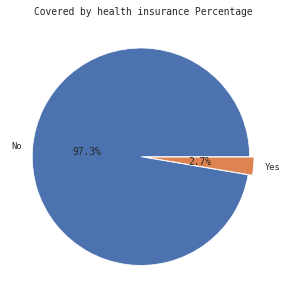

In [43]:
labels = perc.keys() # get labels from perc
# autopct allows formatting percentage string
plt.pie(x=perc, autopct="%.1f%%", explode=[0.02]*2, labels=labels, pctdistance=0.5)
plt.title("Covered by health insurance Percentage");

Countplot for target variable. Countplot shows the number of each category.

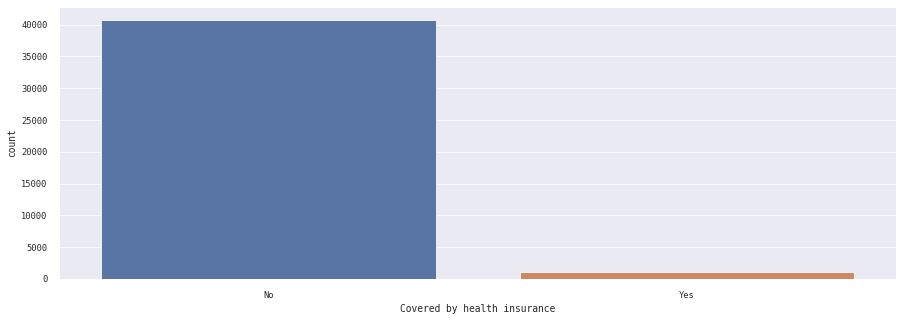

In [44]:
sns.countplot(x='Covered by health insurance', data=target);

**Observation:** The pie plot and count plot shows that there is high imbalance in the target variable. About $97.3\%$ of the populace are without health insurance coverage, while $2.7\%$ have health insurance coverage.

### Among those that answered yes to having a health insurance coverage, what type of health insurance do they have?

Get different types of insurance coverage from df1

In [45]:
insurance = []
for col in df1.columns:
  if 'Health insurance type:' in col:
   insurance.append(col)
print(insurance)

['Health insurance type: mutual/community organization', 'Health insurance type: provided by employer', 'Health insurance type: social security', 'Health insurance type: private/commercially purchased', 'Health insurance type: other']


Get dictionary with insurance type name as key and number of people having the insurance as value.

In [46]:
keys = []
values = []
for i in insurance:
  # get names of different insurance types
  keys.append(df1[i].value_counts().name) 
  # get number of people that answered yes to having a particular insurance type
  values.append(df1[i].value_counts()['Yes'])
  # create the dict
  insurance_type = {key: value for key,value in 
                    zip(keys,values)
                    }
pprint(insurance_type)

{'Health insurance type: mutual/community organization': 210,
 'Health insurance type: other': 15,
 'Health insurance type: private/commercially purchased': 91,
 'Health insurance type: provided by employer': 794,
 'Health insurance type: social security': 17}


In [47]:
sum(insurance_type.values())

1127

In [48]:
sum(insurance_type.values()) == target['Covered by health insurance'].value_counts()['Yes']

False

Convert insurance_type dict to a dataframe, with keys as a column and count as another column.

In [49]:
insurance_df = pd.DataFrame(list(insurance_type.items()), 
                            columns=['insurance type','count'])
insurance_df

,insurance type,count
0,Health insurance type: mutual/community organi...,210
1,Health insurance type: provided by employer,794
2,Health insurance type: social security,17
3,Health insurance type: private/commercially pu...,91
4,Health insurance type: other,15


Rename insurance type column using only the type of insurance.

In [50]:
insurance_df['insurance type'] = [item.split(': ')[-1] for item in insurance_df['insurance type']]
insurance_df

,insurance type,count
0,mutual/community organization,210
1,provided by employer,794
2,social security,17
3,private/commercially purchased,91
4,other,15


Plot class count for insurance types

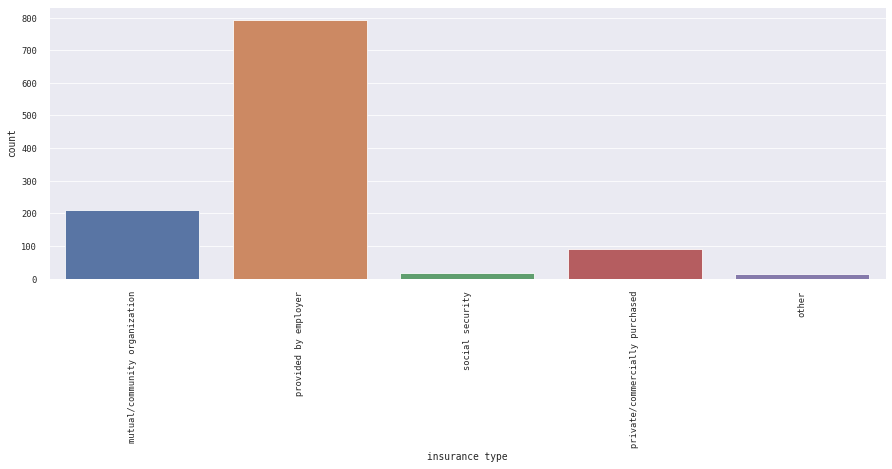

In [51]:
ax = sns.barplot('insurance type', 'count', data=insurance_df)
for item in ax.get_xticklabels():
    item.set_rotation(90)

**Observation:** Most insurance are provided by the employer. Very few people are insured via social security. In addition, those who have privately acquired health insurance are 91 in number. 
 
Health insurance companies might have a better chance of getting people to take up their policies through strengthened engagement with employers. Employer-provided policies are ~8 times more common than privately-acquired policies.

### Numerical features EDA

Get columns for numerical and categorical features from dataframe

In [52]:
cat_feat = df1.select_dtypes(exclude = np.number).columns
num_feat = df1.select_dtypes(exclude = object).columns

In [53]:
print(num_feat)

Index(['Date of interview Century Day Code (CDC)',
       'Respondent's year of birth', 'Date of birth (CMC)',
       'Respondent's current age', 'Education in single years',
       'Number of children 5 and under in household (de jure)',
       'Wealth index factor score combined (5 decimals)',
       'Wealth index factor score for urban/rural (5 decimals)'],
      dtype='object')


In [54]:
len(num_feat)

8

Distribution plot and box plot for numeric features in the dataframe 

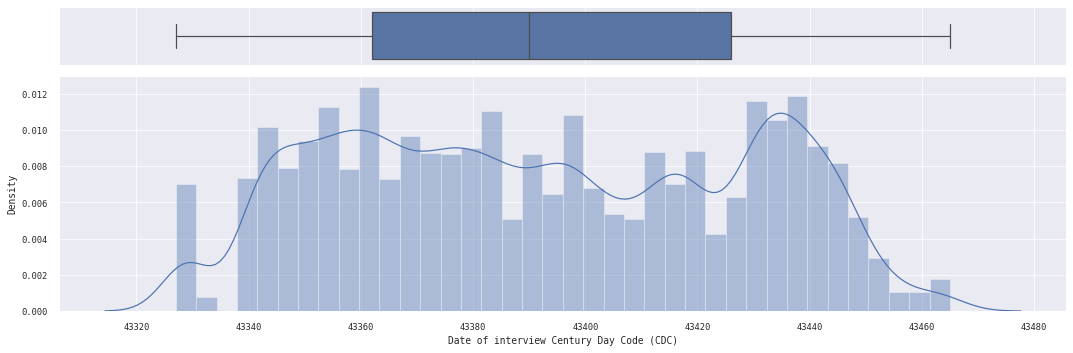

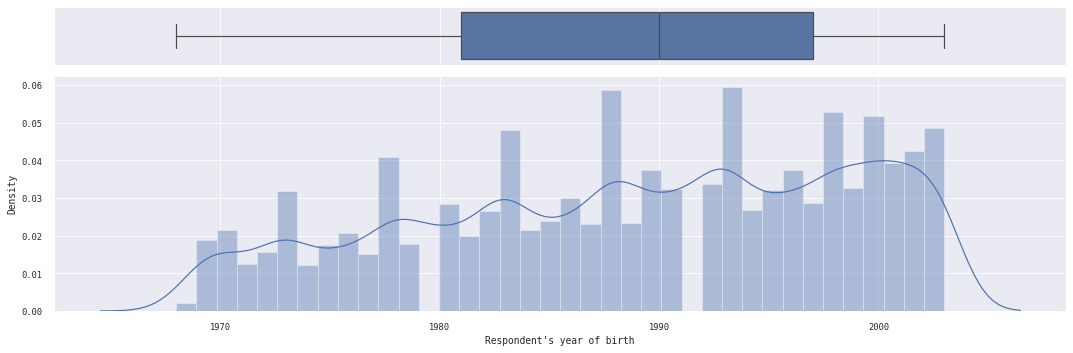

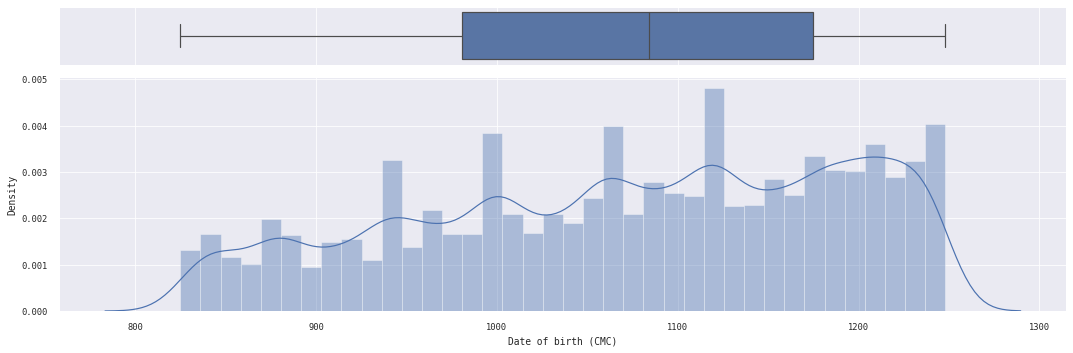

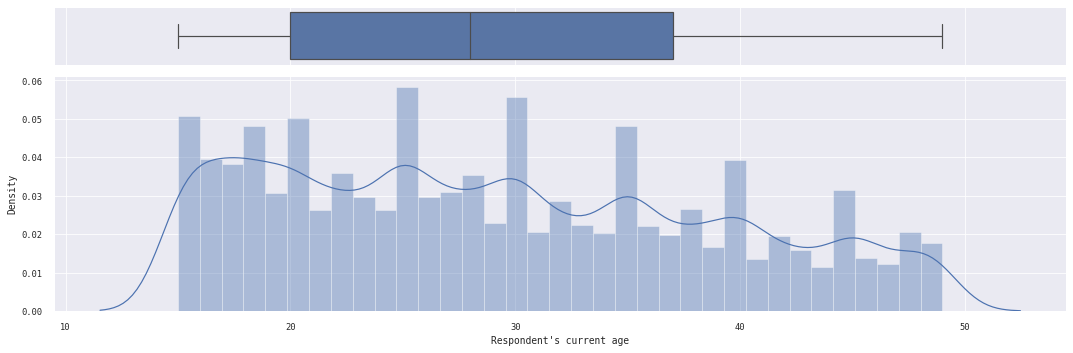

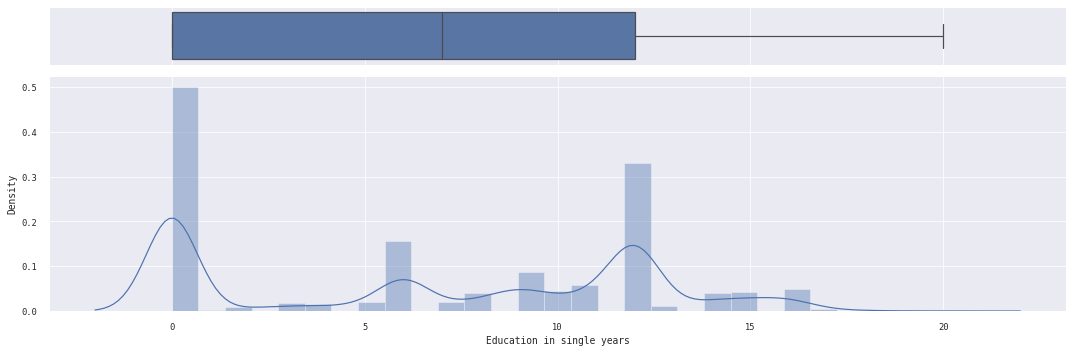

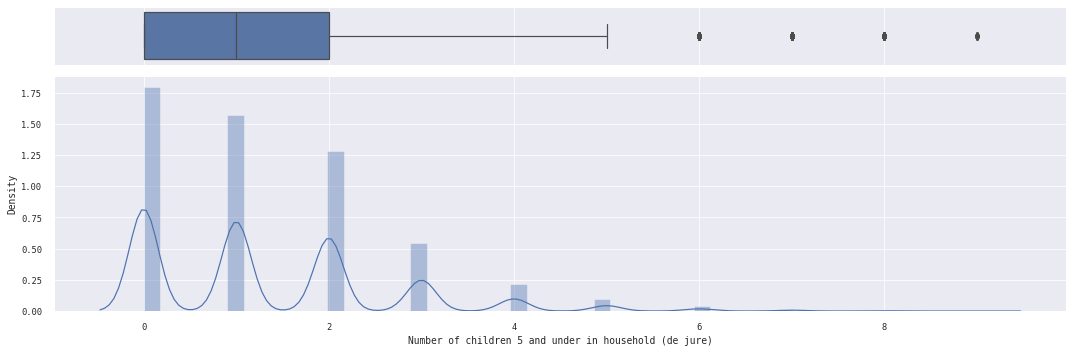

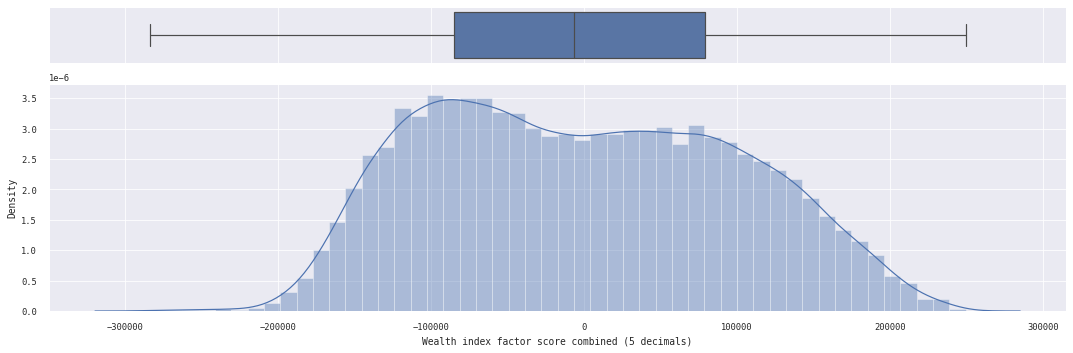

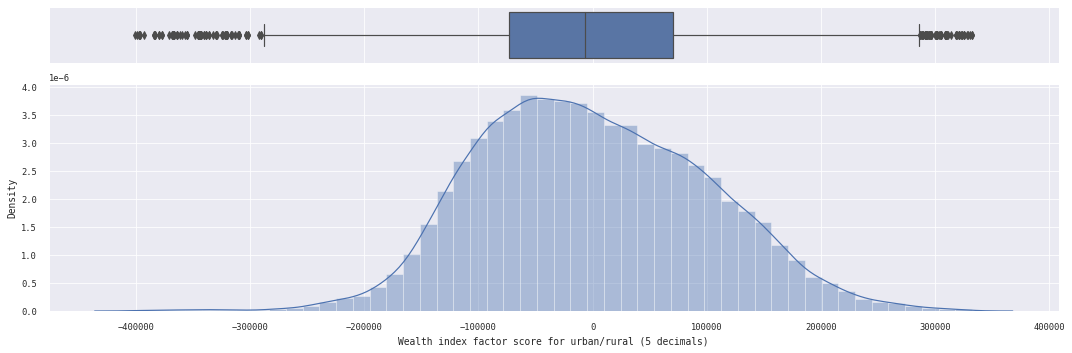

In [55]:
for col in df1[num_feat]:
    # set 2 subplots and set ratio of plots 
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.20, .80)
                                        })   
    g1 = sns.boxplot(col, ax=ax_box, data=df1) # boxplot
    g1.set(xlabel=None) # remove x axis label for boxplot
    g2 = sns.distplot(df1[col], ax=ax_hist) # distribution plot 
    plt.tight_layout()
    plt.show()

**Observation:** 'Number of under-5 children' is not normally distributed and has four outlier points. 'Wealth index factor score' has lots of outliers. Other numerical features looks good.

### Categorical features EDA

Countplot for categorical features in the dataframe 

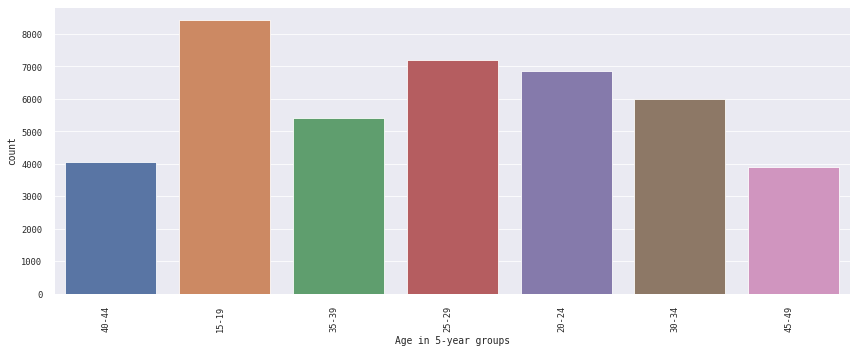

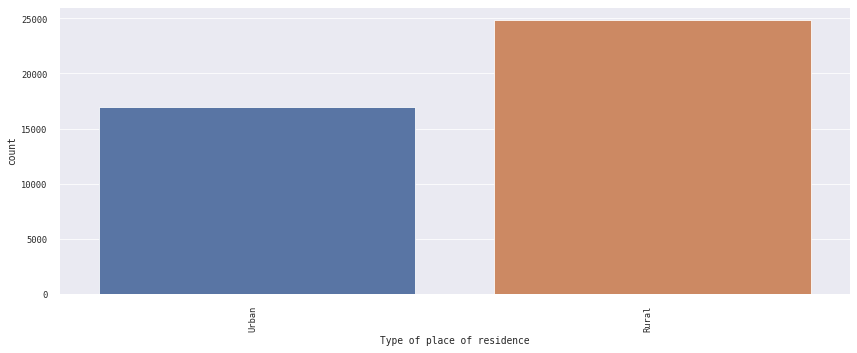

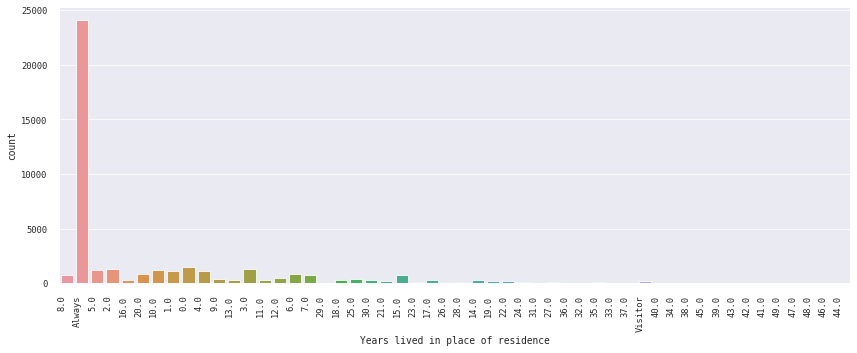

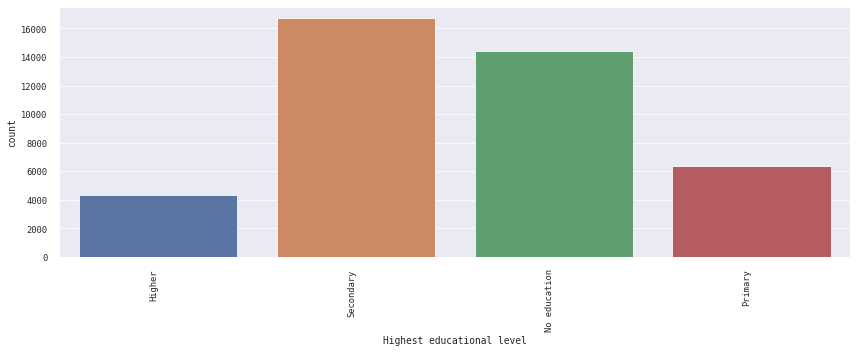

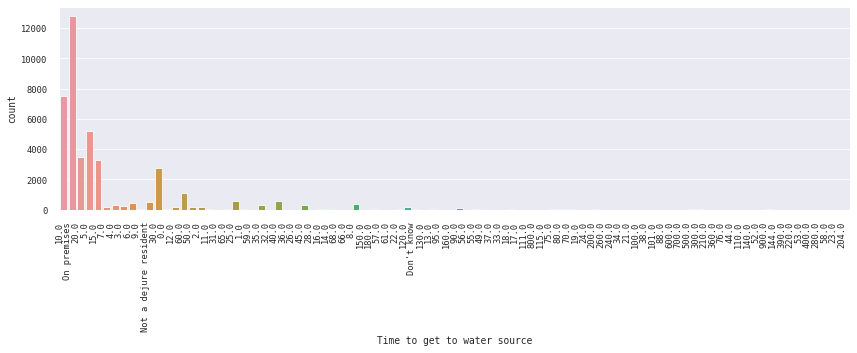

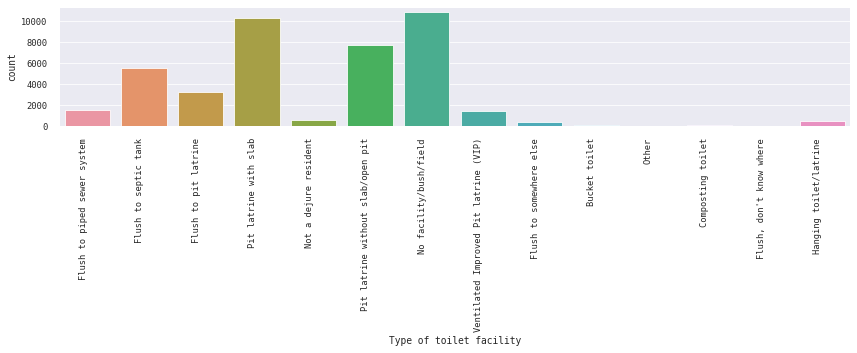

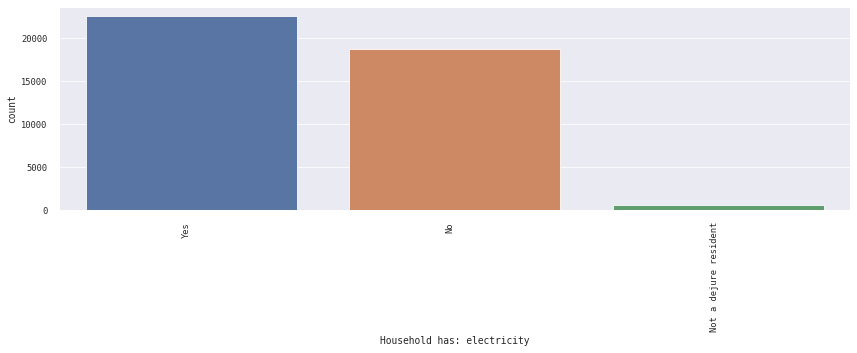

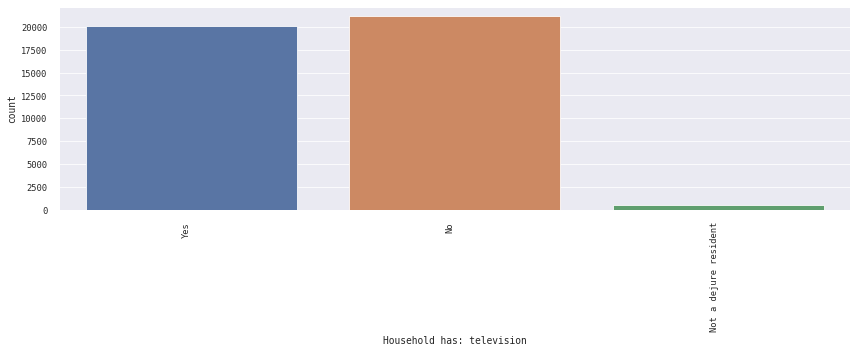

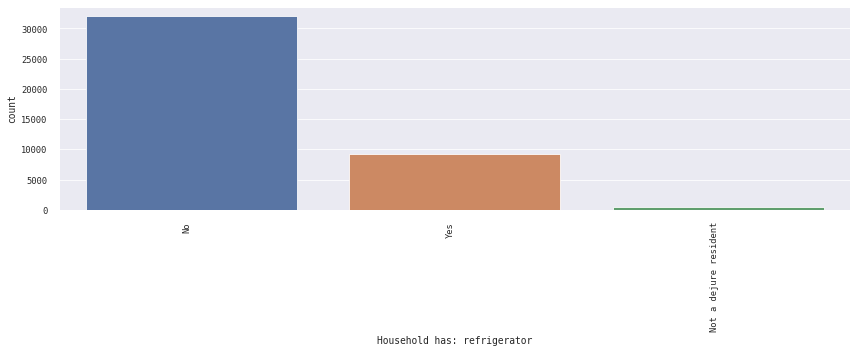

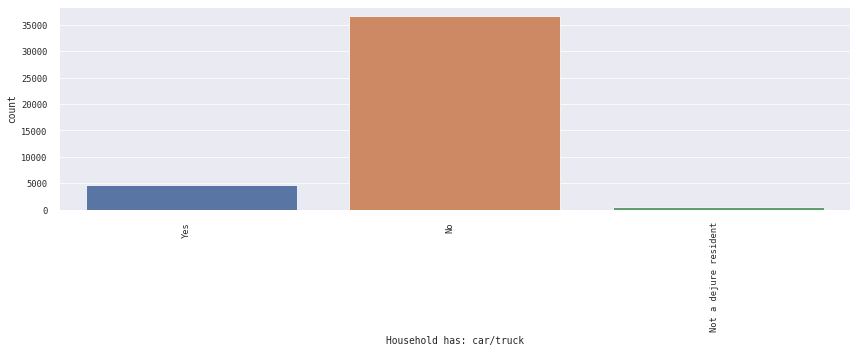

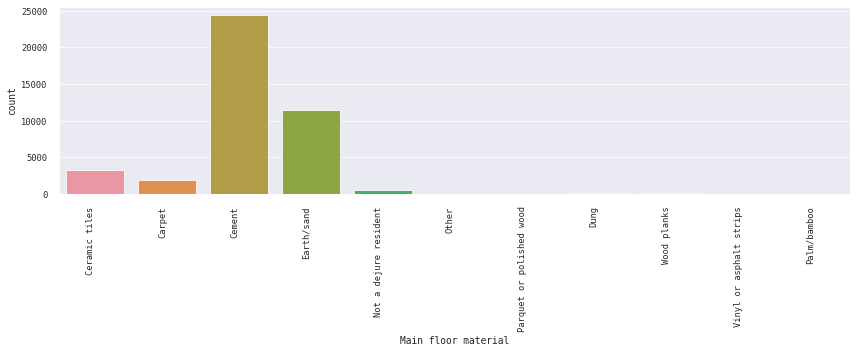

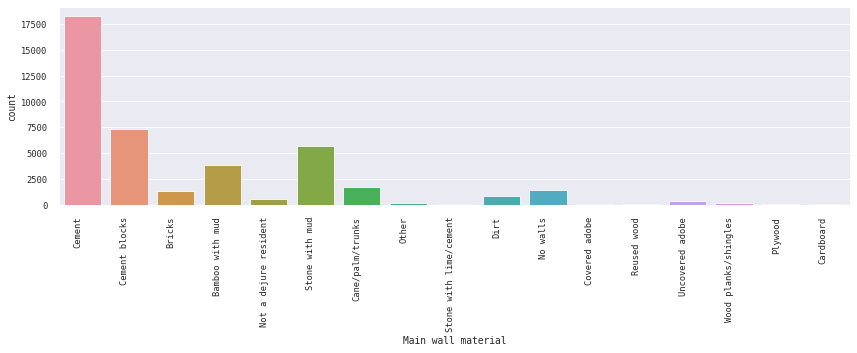

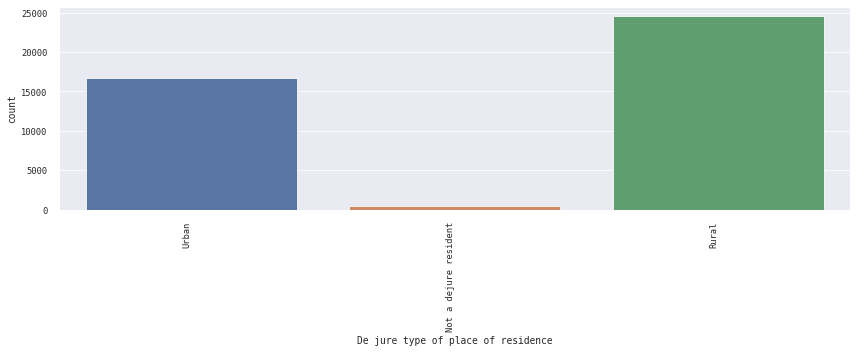

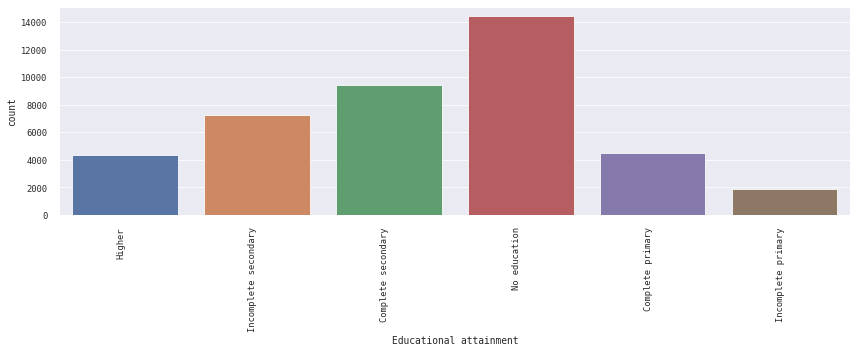

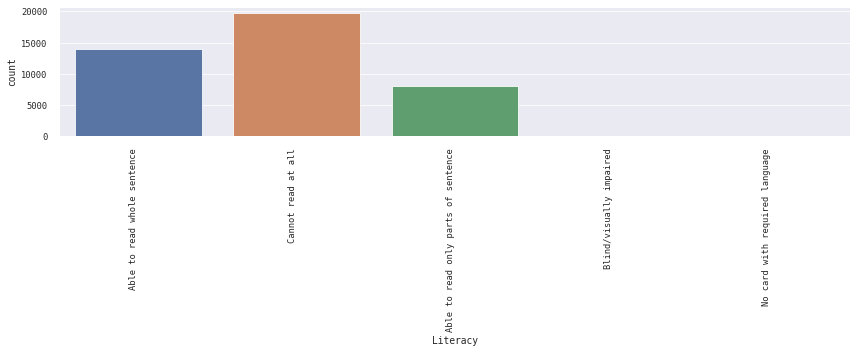

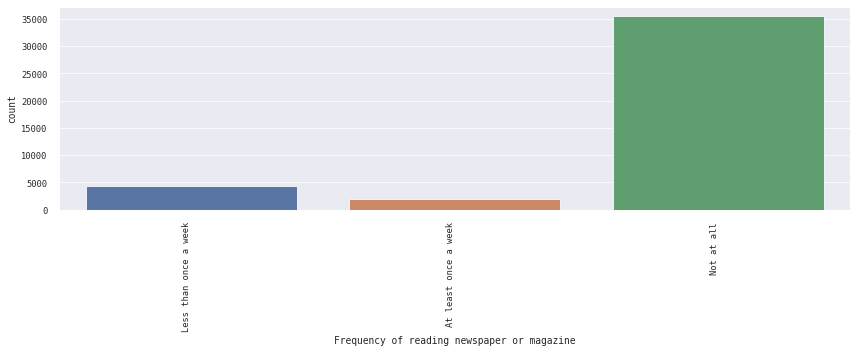

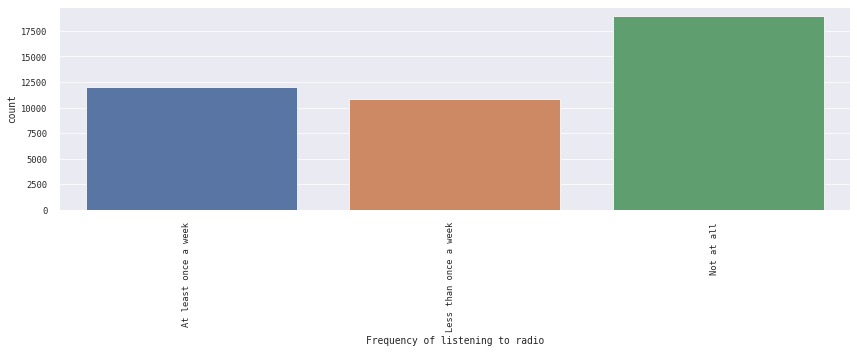

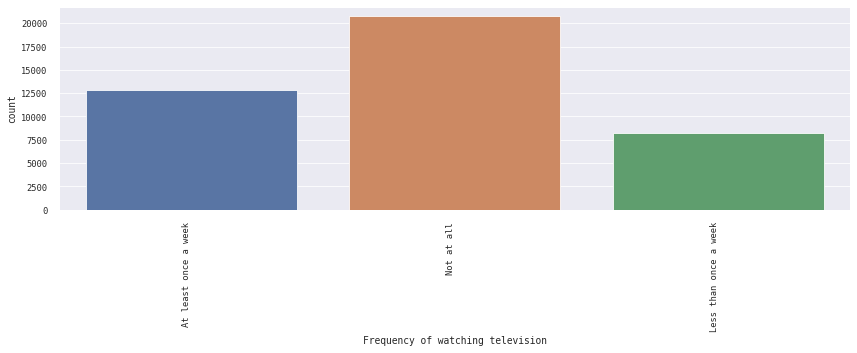

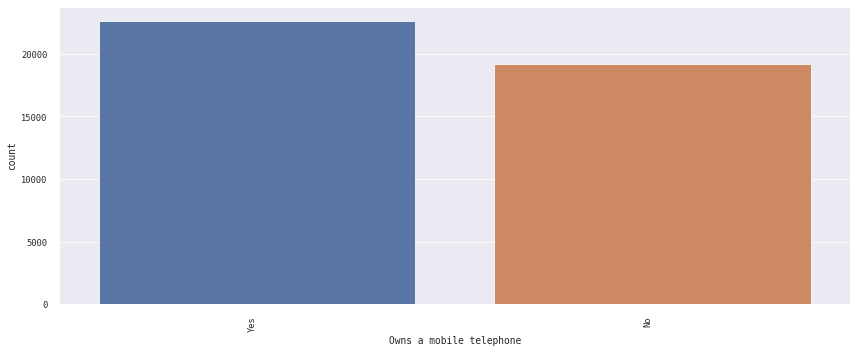

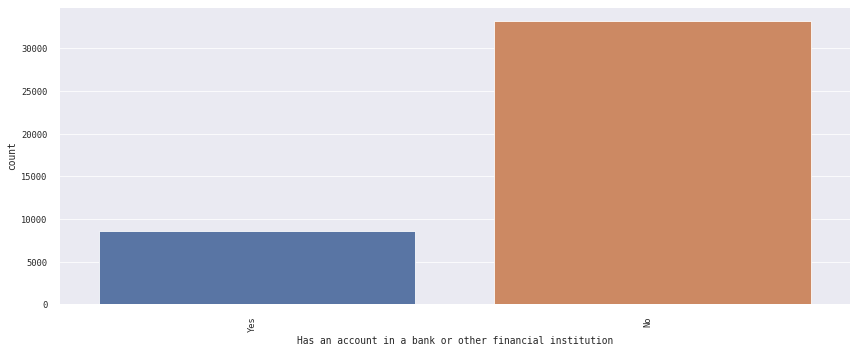

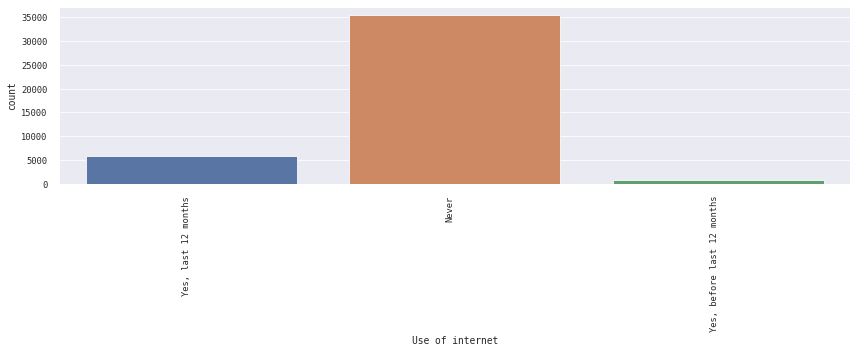

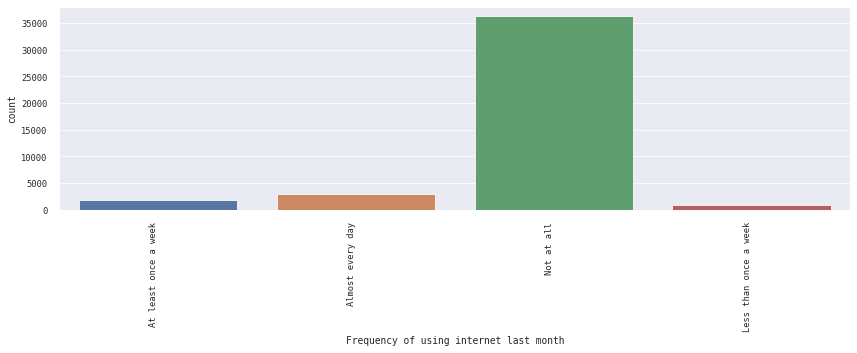

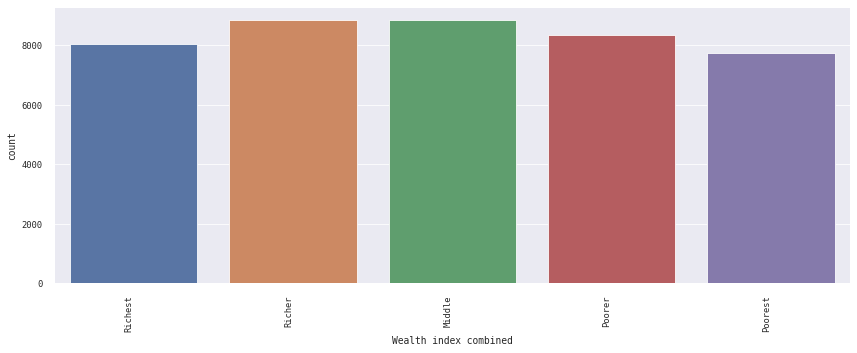

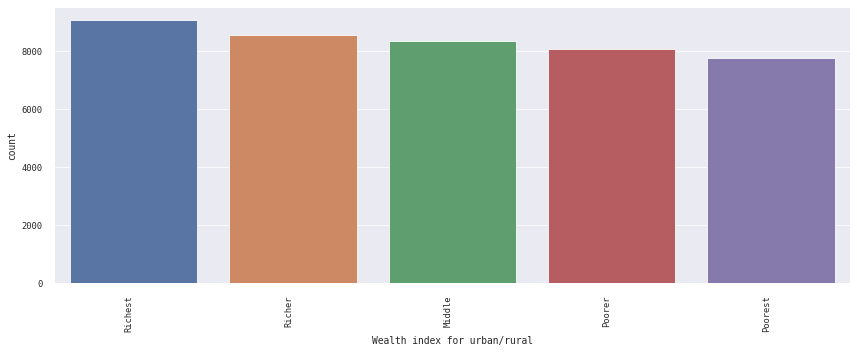

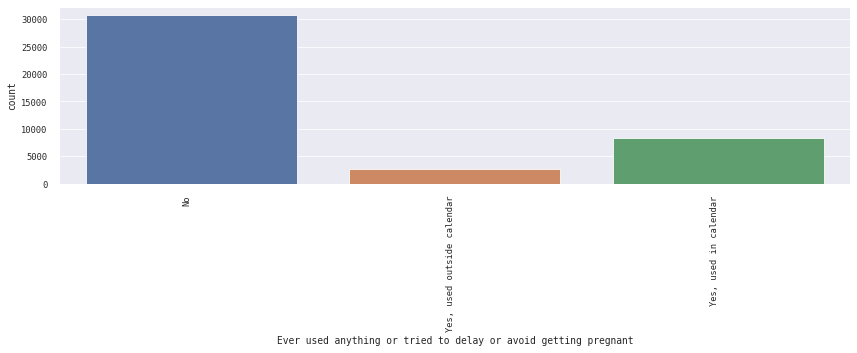

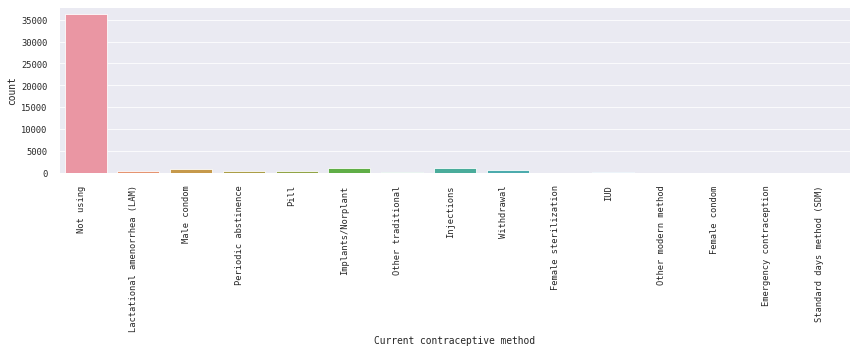

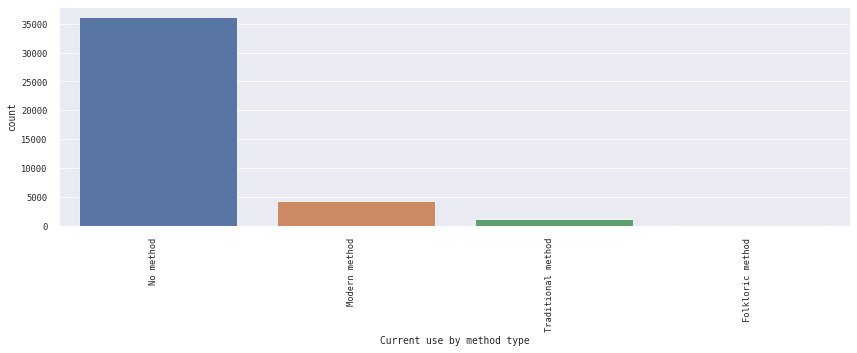

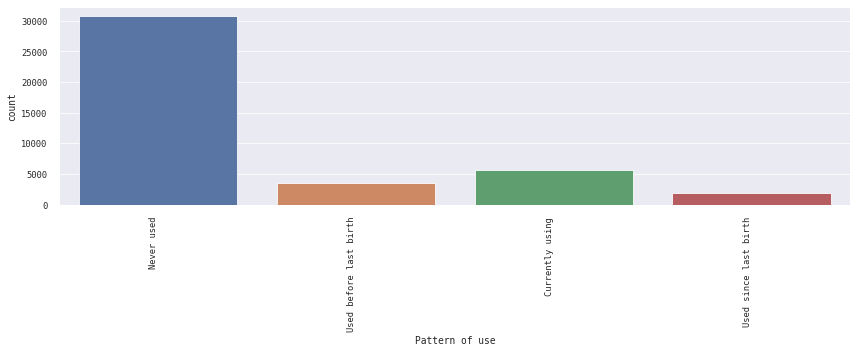

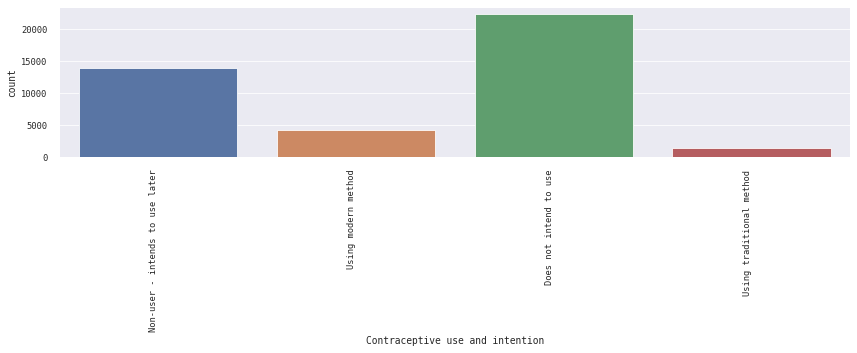

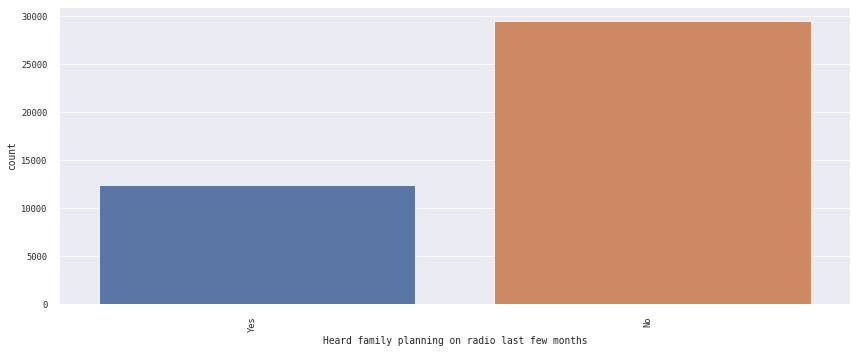

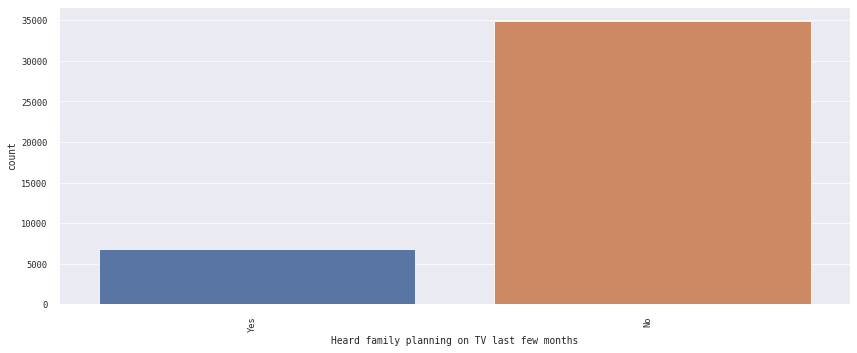

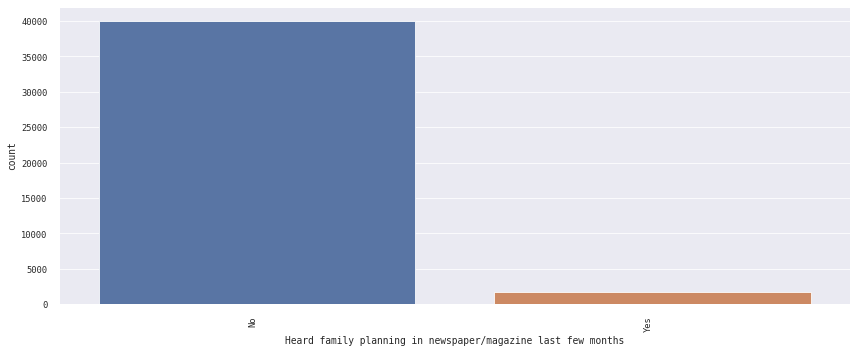

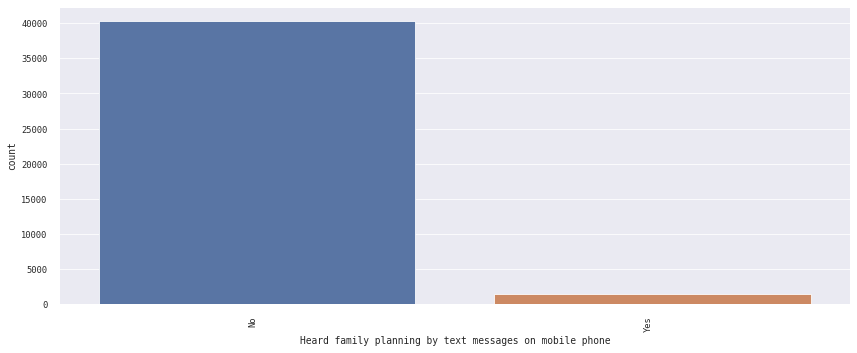

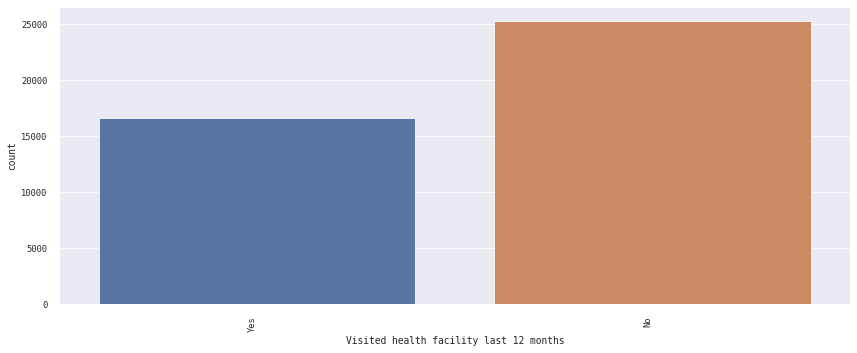

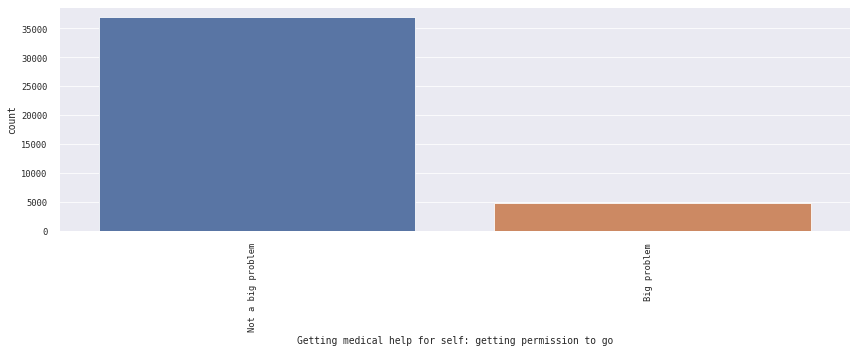

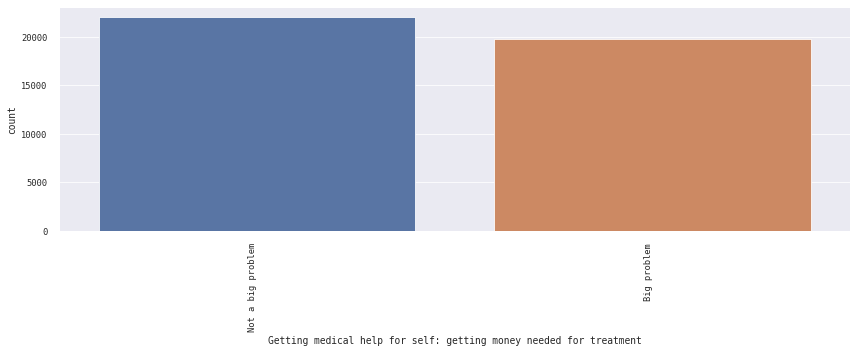

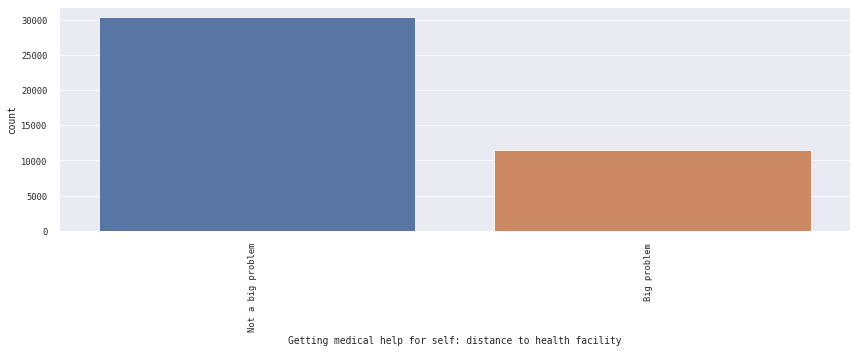

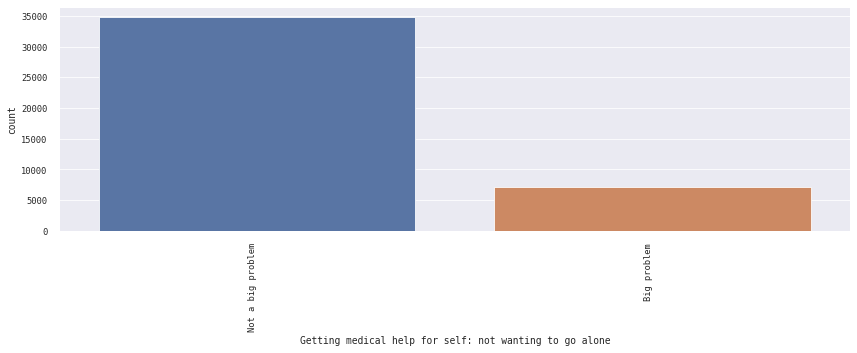

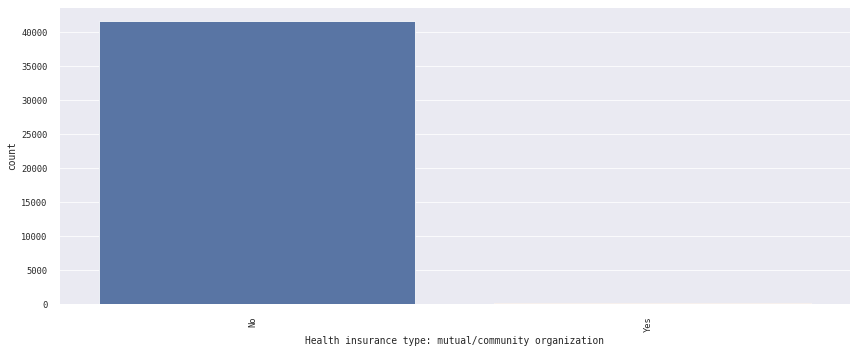

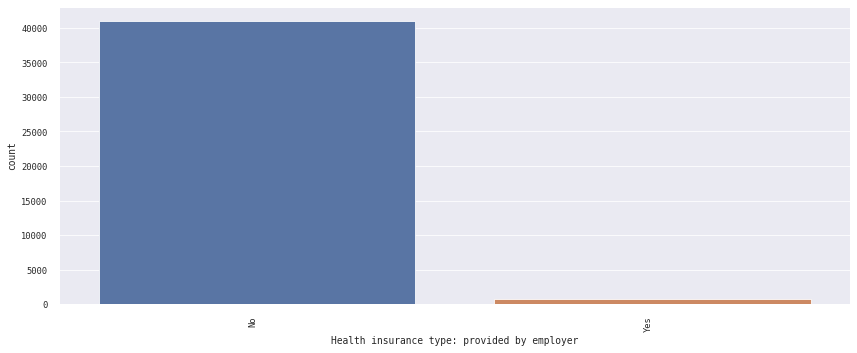

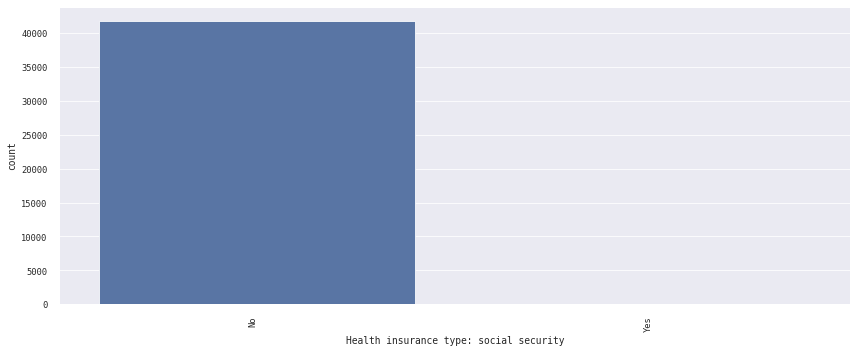

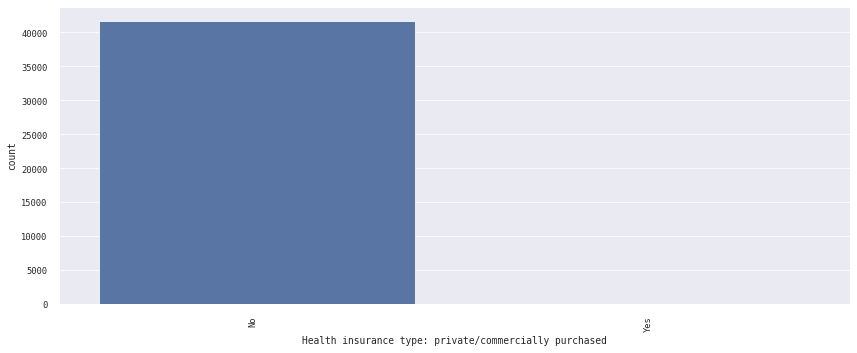

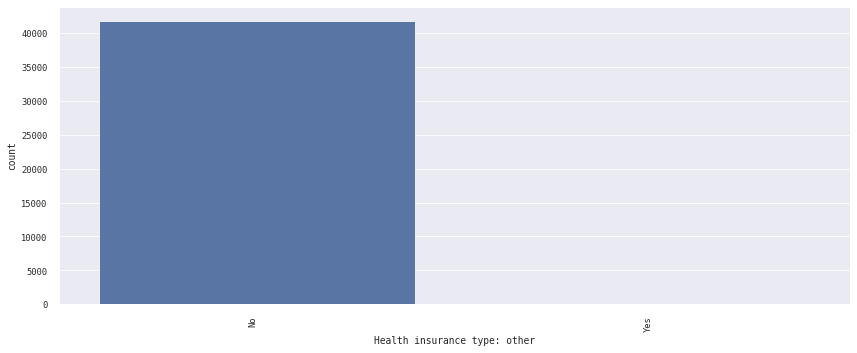

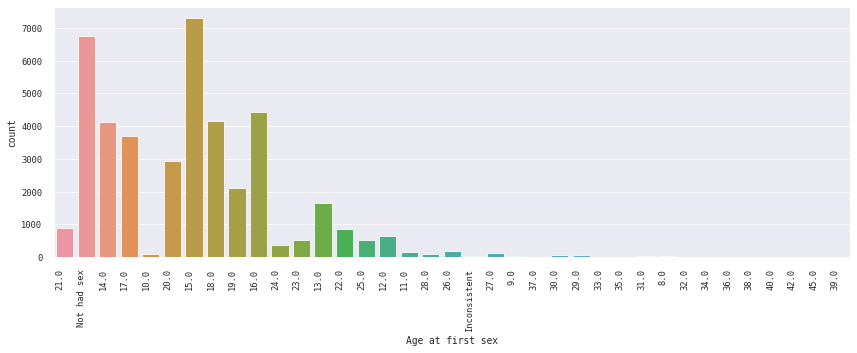

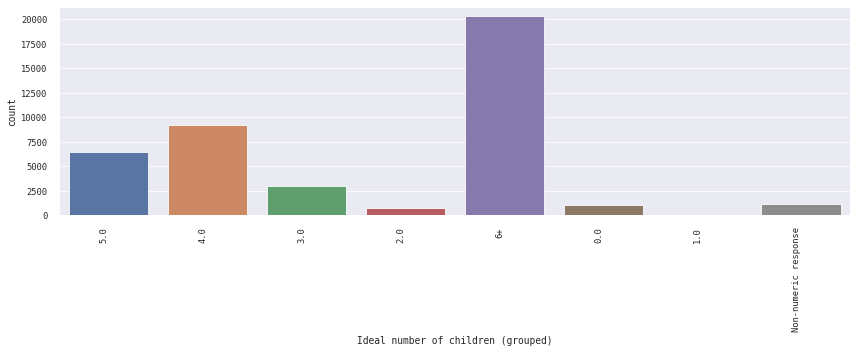

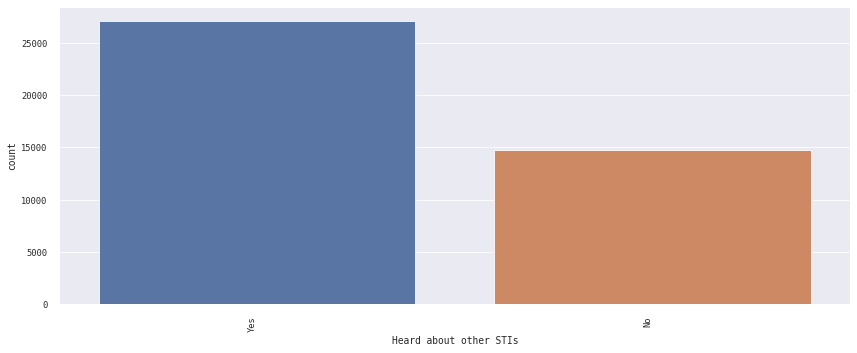

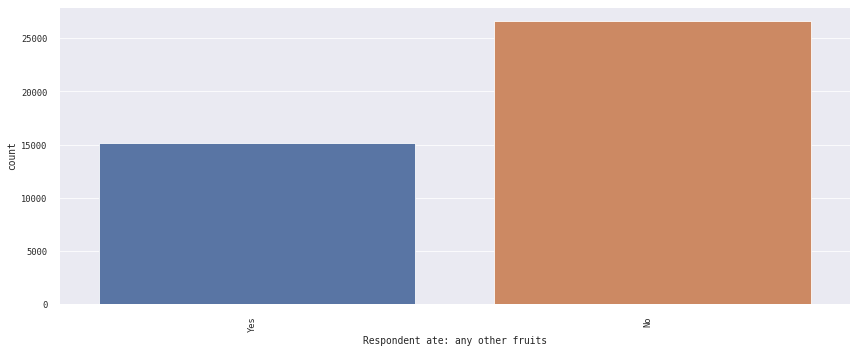

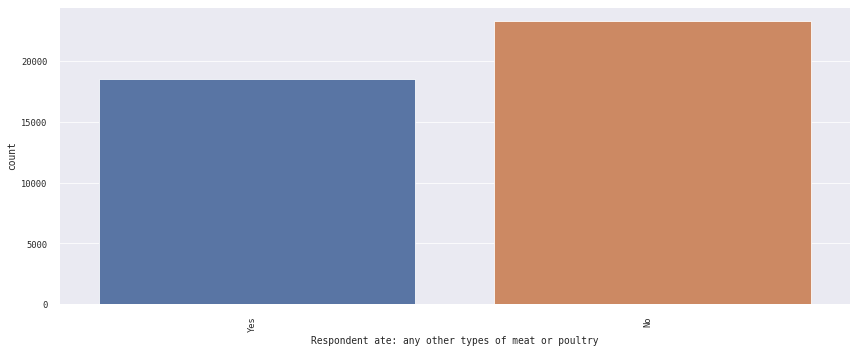

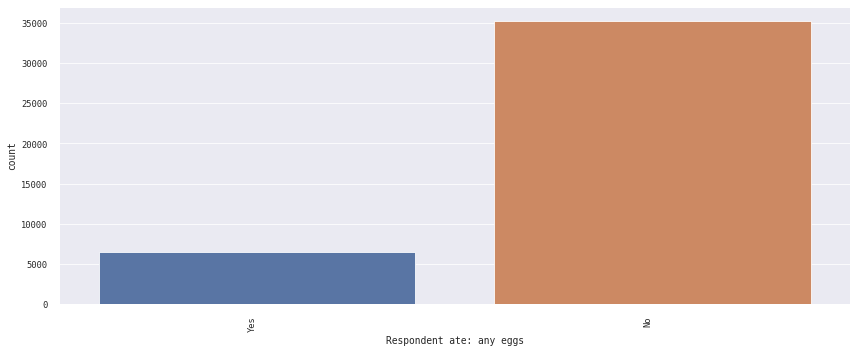

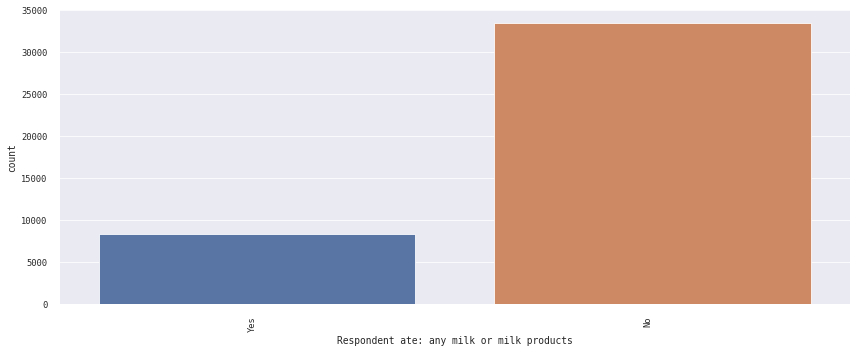

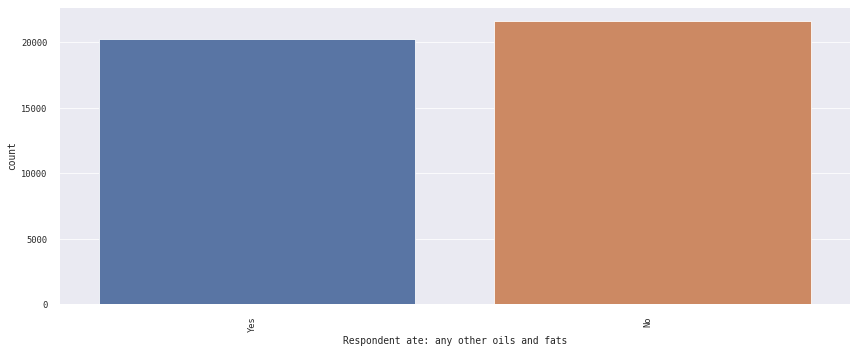

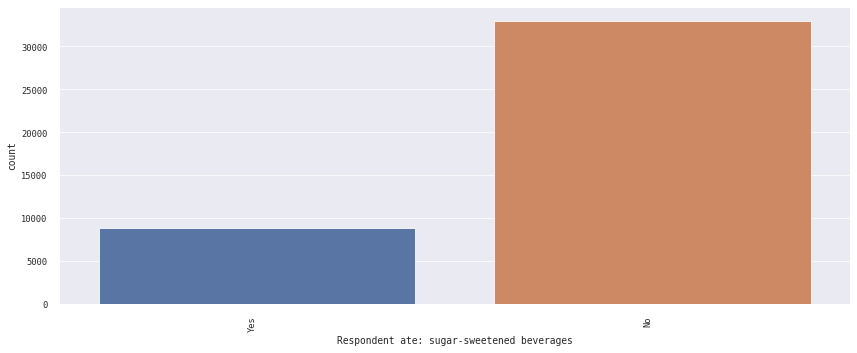

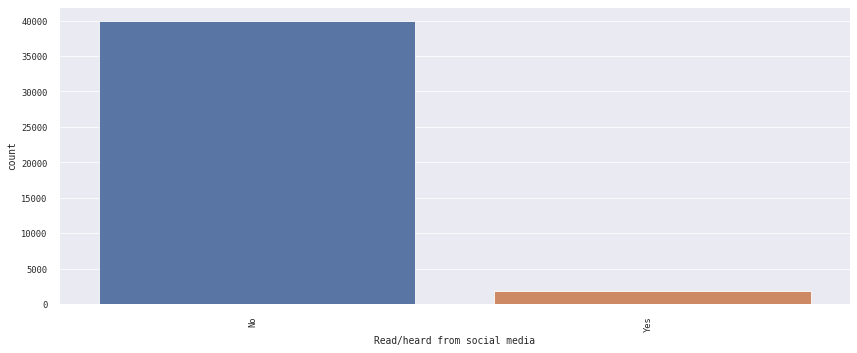

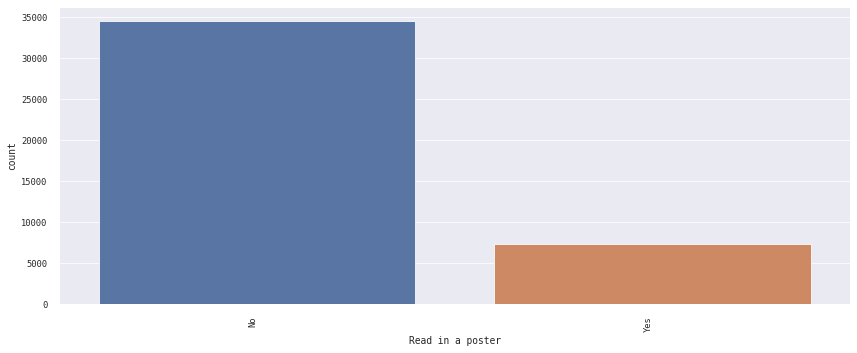

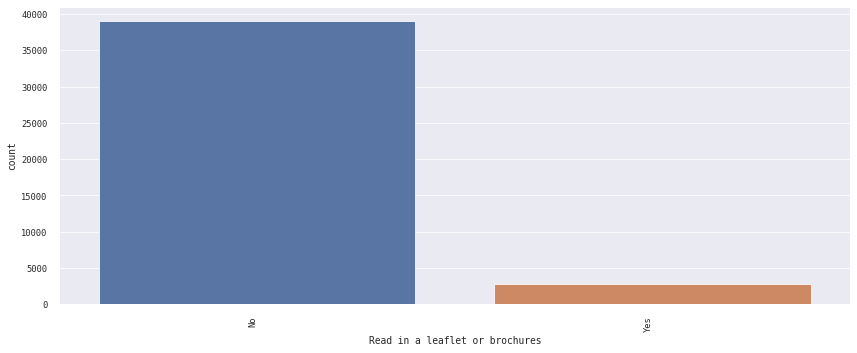

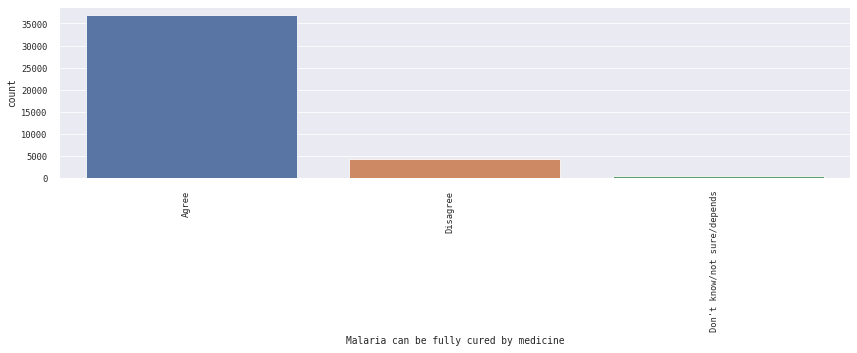

In [56]:
object_count_plot(df1)

## Extra data cleaning 

Create a list of more columns to drop.

In [57]:
to_drop_2 = ['Time to get to water source', 'Age at first sex',
             'Date of interview Century Day Code (CDC)']
for col in df1.columns:
  if 'Respondent ate' in col:
    to_drop_2.append(col)
print(to_drop_2)

['Time to get to water source', 'Age at first sex', 'Date of interview Century Day Code (CDC)', 'Respondent ate: any other fruits', 'Respondent ate: any other types of meat or poultry', 'Respondent ate: any eggs', 'Respondent ate: any milk or milk products', 'Respondent ate: any other oils and fats', 'Respondent ate: sugar-sweetened beverages']


Drop to_drop_2 list defined earlier and the types of insurance package (insurance list) from df1

In [58]:
drop = insurance + to_drop_2

In [59]:
df1.drop(drop, axis=1, inplace=True)
df1.head()

,Respondent's year of birth,Date of birth (CMC),Respondent's current age,Age in 5-year groups,Type of place of residence,Years lived in place of residence,Highest educational level,Type of toilet facility,Household has: electricity,Household has: television,Household has: refrigerator,Household has: car/truck,Main floor material,Main wall material,Education in single years,Number of children 5 and under in household (de jure),De jure type of place of residence,Educational attainment,Literacy,Frequency of reading newspaper or magazine,Frequency of listening to radio,Frequency of watching television,Owns a mobile telephone,Has an account in a bank or other financial institution,Use of internet,Frequency of using internet last month,Wealth index combined,Wealth index factor score combined (5 decimals),Wealth index for urban/rural,Wealth index factor score for urban/rural (5 decimals),Ever used anything or tried to delay or avoid getting pregnant,Current contraceptive method,Current use by method type,Pattern of use,Contraceptive use and intention,Heard family planning on radio last few months,Heard family planning on TV last few months,Heard family planning in newspaper/magazine last few months,Heard family planning by text messages on mobile phone,Visited health facility last 12 months,Getting medical help for self: getting permission to go,Getting medical help for self: getting money needed for treatment,Getting medical help for self: distance to health facility,Getting medical help for self: not wanting to go alone,Ideal number of children (grouped),Heard about other STIs,Read/heard from social media,Read in a poster,Read in a leaflet or brochures,Malaria can be fully cured by medicine
0,1978.0,939.0,40.0,40-44,Urban,8,Higher,Flush to piped sewer system,Yes,Yes,No,Yes,Ceramic tiles,Cement,15.0,1.0,Urban,Higher,Able to read whole sentence,Less than once a week,At least once a week,At least once a week,Yes,Yes,"Yes, last 12 months",At least once a week,Richest,158617.0,Richest,115856.0,No,Not using,No method,Never used,Non-user - intends to use later,Yes,Yes,No,No,Yes,Not a big problem,Not a big problem,Not a big problem,Not a big problem,5,Yes,No,No,No,Agree
1,2002.0,1230.0,16.0,15-19,Urban,Always,Secondary,Flush to septic tank,Yes,Yes,Yes,Yes,Ceramic tiles,Cement blocks,10.0,0.0,Urban,Incomplete secondary,Able to read whole sentence,At least once a week,Less than once a week,At least once a week,No,No,"Yes, last 12 months",Almost every day,Richest,187140.0,Richest,149135.0,No,Not using,No method,Never used,Non-user - intends to use later,No,Yes,Yes,No,Yes,Not a big problem,Not a big problem,Not a big problem,Not a big problem,4,Yes,Yes,No,No,Agree
2,1981.0,977.0,37.0,35-39,Urban,5,Higher,Flush to piped sewer system,Yes,Yes,Yes,Yes,Carpet,Cement,15.0,2.0,Urban,Higher,Able to read whole sentence,Not at all,At least once a week,At least once a week,Yes,Yes,Never,Not at all,Richest,171481.0,Richest,130865.0,"Yes, used outside calendar",Not using,No method,Used before last birth,Non-user - intends to use later,Yes,Yes,No,Yes,Yes,Not a big problem,Not a big problem,Not a big problem,Not a big problem,4,Yes,No,Yes,No,Agree
3,1990.0,1091.0,27.0,25-29,Urban,2,Higher,Flush to piped sewer system,Yes,Yes,Yes,Yes,Ceramic tiles,Cement,14.0,1.0,Urban,Higher,Able to read whole sentence,Not at all,At least once a week,At least once a week,Yes,Yes,"Yes, last 12 months",Less than once a week,Richest,149597.0,Richest,105331.0,"Yes, used in calendar",Lactational amenorrhea (LAM),Modern method,Currently using,Using modern method,No,No,No,No,No,Not a big problem,Big problem,Not a big problem,Not a big problem,3,Yes,No,No,No,Disagree
4,1989.0,1073.0,29.0,25-29,Urban,Always,Secondary,Flush to piped sewer system,Yes,Yes,No,No,Carpet,Cement,12.0,0.0,Urban,Complete secondary,Able to read whole sentence,At least once a week,At least once a week,At least once a week,Yes,Yes,"Yes, last 12 months",Almost every day,Richest,105197.0,Richer,53526.0,No,Not using

In [60]:
df1.shape

(41821, 50)

## Build Model and Evaluate 

Concatenate target variable to df1

In [61]:
df1['target'] = target
df1.head()  

,Respondent's year of birth,Date of birth (CMC),Respondent's current age,Age in 5-year groups,Type of place of residence,Years lived in place of residence,Highest educational level,Type of toilet facility,Household has: electricity,Household has: television,Household has: refrigerator,Household has: car/truck,Main floor material,Main wall material,Education in single years,Number of children 5 and under in household (de jure),De jure type of place of residence,Educational attainment,Literacy,Frequency of reading newspaper or magazine,Frequency of listening to radio,Frequency of watching television,Owns a mobile telephone,Has an account in a bank or other financial institution,Use of internet,Frequency of using internet last month,Wealth index combined,Wealth index factor score combined (5 decimals),Wealth index for urban/rural,Wealth index factor score for urban/rural (5 decimals),Ever used anything or tried to delay or avoid getting pregnant,Current contraceptive method,Current use by method type,Pattern of use,Contraceptive use and intention,Heard family planning on radio last few months,Heard family planning on TV last few months,Heard family planning in newspaper/magazine last few months,Heard family planning by text messages on mobile phone,Visited health facility last 12 months,Getting medical help for self: getting permission to go,Getting medical help for self: getting money needed for treatment,Getting medical help for self: distance to health facility,Getting medical help for self: not wanting to go alone,Ideal number of children (grouped),Heard about other STIs,Read/heard from social media,Read in a poster,Read in a leaflet or brochures,Malaria can be fully cured by medicine,target
0,1978.0,939.0,40.0,40-44,Urban,8,Higher,Flush to piped sewer system,Yes,Yes,No,Yes,Ceramic tiles,Cement,15.0,1.0,Urban,Higher,Able to read whole sentence,Less than once a week,At least once a week,At least once a week,Yes,Yes,"Yes, last 12 months",At least once a week,Richest,158617.0,Richest,115856.0,No,Not using,No method,Never used,Non-user - intends to use later,Yes,Yes,No,No,Yes,Not a big problem,Not a big problem,Not a big problem,Not a big problem,5,Yes,No,No,No,Agree,No
1,2002.0,1230.0,16.0,15-19,Urban,Always,Secondary,Flush to septic tank,Yes,Yes,Yes,Yes,Ceramic tiles,Cement blocks,10.0,0.0,Urban,Incomplete secondary,Able to read whole sentence,At least once a week,Less than once a week,At least once a week,No,No,"Yes, last 12 months",Almost every day,Richest,187140.0,Richest,149135.0,No,Not using,No method,Never used,Non-user - intends to use later,No,Yes,Yes,No,Yes,Not a big problem,Not a big problem,Not a big problem,Not a big problem,4,Yes,Yes,No,No,Agree,No
2,1981.0,977.0,37.0,35-39,Urban,5,Higher,Flush to piped sewer system,Yes,Yes,Yes,Yes,Carpet,Cement,15.0,2.0,Urban,Higher,Able to read whole sentence,Not at all,At least once a week,At least once a week,Yes,Yes,Never,Not at all,Richest,171481.0,Richest,130865.0,"Yes, used outside calendar",Not using,No method,Used before last birth,Non-user - intends to use later,Yes,Yes,No,Yes,Yes,Not a big problem,Not a big problem,Not a big problem,Not a big problem,4,Yes,No,Yes,No,Agree,No
3,1990.0,1091.0,27.0,25-29,Urban,2,Higher,Flush to piped sewer system,Yes,Yes,Yes,Yes,Ceramic tiles,Cement,14.0,1.0,Urban,Higher,Able to read whole sentence,Not at all,At least once a week,At least once a week,Yes,Yes,"Yes, last 12 months",Less than once a week,Richest,149597.0,Richest,105331.0,"Yes, used in calendar",Lactational amenorrhea (LAM),Modern method,Currently using,Using modern method,No,No,No,No,No,Not a big problem,Big problem,Not a big problem,Not a big problem,3,Yes,No,No,No,Disagree,No
4,1989.0,1073.0,29.0,25-29,Urban,Always,Secondary,Flush to piped sewer system,Yes,Yes,No,No,Carpet,Cement,12.0,0.0,Urban,Complete secondary,Able to read whole sentence,At least once a week,At least once a week,At least once a week,Yes,Yes,"Yes, last 12 months",Almost every day,Richest,105197.0,Richer,5

Label encode categorical variables in df1. Label encoding is simply converting each value in a categorical column to a number based on each category.

In [62]:
# get categorical features from df1
cat_feat = df1.select_dtypes(exclude = np.number).columns 
print(cat_feat)

Index(['Age in 5-year groups', 'Type of place of residence',
       'Years lived in place of residence', 'Highest educational level',
       'Type of toilet facility', 'Household has: electricity',
       'Household has: television', 'Household has: refrigerator',
       'Household has: car/truck', 'Main floor material', 'Main wall material',
       'De jure type of place of residence', 'Educational attainment',
       'Literacy', 'Frequency of reading newspaper or magazine',
       'Frequency of listening to radio', 'Frequency of watching television',
       'Owns a mobile telephone',
       'Has an account in a bank or other financial institution',
       'Use of internet', 'Frequency of using internet last month',
       'Wealth index combined', 'Wealth index for urban/rural',
       'Ever used anything or tried to delay or avoid getting pregnant',
       'Current contraceptive method', 'Current use by method type',
       'Pattern of use', 'Contraceptive use and intention',
       

In [63]:
# label encode categorical features 
for feat in cat_feat:
  df1[feat] = pd.factorize(df1[feat])[0]

df1.head() 

,Respondent's year of birth,Date of birth (CMC),Respondent's current age,Age in 5-year groups,Type of place of residence,Years lived in place of residence,Highest educational level,Type of toilet facility,Household has: electricity,Household has: television,Household has: refrigerator,Household has: car/truck,Main floor material,Main wall material,Education in single years,Number of children 5 and under in household (de jure),De jure type of place of residence,Educational attainment,Literacy,Frequency of reading newspaper or magazine,Frequency of listening to radio,Frequency of watching television,Owns a mobile telephone,Has an account in a bank or other financial institution,Use of internet,Frequency of using internet last month,Wealth index combined,Wealth index factor score combined (5 decimals),Wealth index for urban/rural,Wealth index factor score for urban/rural (5 decimals),Ever used anything or tried to delay or avoid getting pregnant,Current contraceptive method,Current use by method type,Pattern of use,Contraceptive use and intention,Heard family planning on radio last few months,Heard family planning on TV last few months,Heard family planning in newspaper/magazine last few months,Heard family planning by text messages on mobile phone,Visited health facility last 12 months,Getting medical help for self: getting permission to go,Getting medical help for self: getting money needed for treatment,Getting medical help for self: distance to health facility,Getting medical help for self: not wanting to go alone,Ideal number of children (grouped),Heard about other STIs,Read/heard from social media,Read in a poster,Read in a leaflet or brochures,Malaria can be fully cured by medicine,target
0,1978.0,939.0,40.0,0,0,0,0,0,0,0,0,0,0,0,15.0,1.0,0,0,0,0,0,0,0,0,0,0,0,158617.0,0,115856.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2002.0,1230.0,16.0,1,0,1,1,1,0,0,1,0,0,1,10.0,0.0,0,1,0,1,1,0,1,1,0,1,0,187140.0,0,149135.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
2,1981.0,977.0,37.0,2,0,2,0,0,0,0,1,0,1,0,15.0,2.0,0,0,0,2,0,0,0,0,1,2,0,171481.0,0,130865.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1990.0,1091.0,27.0,3,0,3,0,0,0,0,1,0,0,0,14.0,1.0,0,0,0,2,0,0,0,0,0,3,0,149597.0,0,105331.0,2,1,1,2,1,1,1,0,0,1,0,1,0,0,2,0,0,0,0,1,0
4,1989.0,1073.0,29.0,3,0,1,1,0,0,0,0,1,1,0,12.0,0.0,0,2,0,1,0,0,0,0,0,1,0,105197.0,1,53526.0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


Set feature and target variables from df1. X is features, y is target.

In [152]:
X = df1.loc[:, ~df1.columns.isin(['target'])]
y = df1['target']

print(X.shape, y.shape) 

(41821, 50) (41821,)


We use StratifiedKFold to split the data, since we are dealing with a highly imbalaced dataset. StratifiedKFold splits a dataset randomly, although in such a way that maintains the same class distribution in each subset

In [153]:
from sklearn.model_selection import StratifiedKFold

#set number of splits
K = 5
# initiate StratifiedKFold 
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=1)

### Helper functions

In [241]:
from sklearn.metrics import ( accuracy_score, f1_score, precision_score, 
                             recall_score, classification_report, 
                             confusion_matrix, roc_auc_score )
from scipy import stats

In [269]:
def fit_predict(model, X, y):
    ''' Description: Creates feature importance plot for a model
      Arguements: model - machine learning model to be trained 
                  X - training dataset
                  y - target column
    ''' 
    # set initial score
    scores = 0
    # set empty list to store predictions on test set 
    test_oofs = []
    # get model name
    model_name = type(model).__name__ 

    for i, (tr_idx, vr_idx) in enumerate(kfold.split(X,y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # training 
        if model_name in ['LogisticRegression','RandomForestClassifier']:
          model.fit(X_train, y_train)
        else:
          model.fit(X_train, y_train, 
                    eval_set=[(X_test, y_test)],
                    use_best_model=True)       
        
        # predicting on test set
        pred = model.predict(X_test)
        # get F1-score
        score = f1_score(y_test, pred, average='macro')
        # take mean of scores
        scores += score/K
        test_oofs.append(pred)

        print('Fold {} : {}'.format(i, score))

    print()
    print()
    print('Avg F1 score: {:.4f} '.format(scores))

    predictions = stats.mode(test_oofs)[0].reshape(-1)

    return predictions, model_name


In [ ]:
def check_metric(y_test, predict):
  ''' Description: Print different metric score for a model '''
  # accuracy = accuracy_score(y_test, predict)
  precision = precision_score(y_test, predict, average='macro')
  recall = recall_score(y_test, predict, average='macro')
  f1 = f1_score(y_test, predict, average='macro')
  roc = roc_auc_score(y_test, predict)
  # print("Validation Accuracy: {:.4f}".format(accuracy))
  print("Validation Precision: {:.4f}".format(precision))
  print("Validation Recall: {:.4f}".format(recall))
  print("Validation F1 Score: {:.4f}".format(f1))
  print("ROC AUC Score: {:.4f}".format(roc))

In [96]:
def importance_plot(model, X):
  ''' Description: Creates feature importance plot for a model
      Arguements: model - trained model on dataset
                  X - training dataset
  ''' 
  model_name = type(model).__name__ 
  if model_name in ['LogisticRegression','LinearRegression']:
    feat_imp = pd.DataFrame(sorted(zip(model.coef_[0],X.columns)), 
                          columns=['Value','Feature']) 
  else:
    feat_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X.columns)), 
                          columns=['Value','Feature']) 
  plt.figure(figsize=(20,15))
  sns.barplot(x="Value", y="Feature", data=feat_imp.sort_values(by="Value", 
                                                                ascending=False))
  plt.ylabel('Feature Importance Score')
  plt.title(model_name + ' Feature Importance')
  plt.show() 

### Logistic Regression

In [270]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [271]:
predict, model_ = fit_predict(log_reg, X, y)

Fold 0 : 0.4932137663596704
Fold 1 : 0.4932137663596704
Fold 2 : 0.4932137663596704
Fold 3 : 0.4932137663596704
Fold 4 : 0.4932137663596704


Avg F1 score: 0.4932 


Evaluation metrics

In [263]:
# check_metric(y_test,predict)

In [ ]:
# print(classification_report(y_test, predict))

Confusion matrix heatmap

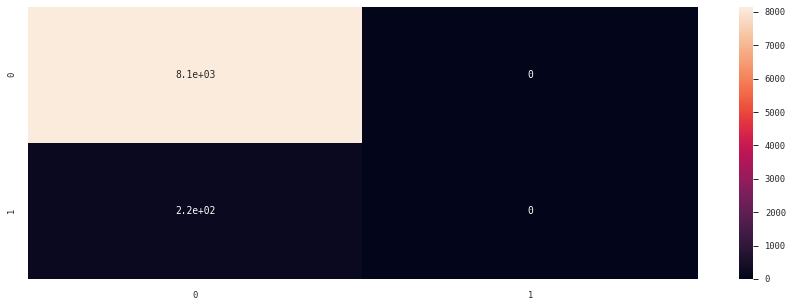

In [272]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True);

Feature Importance plot

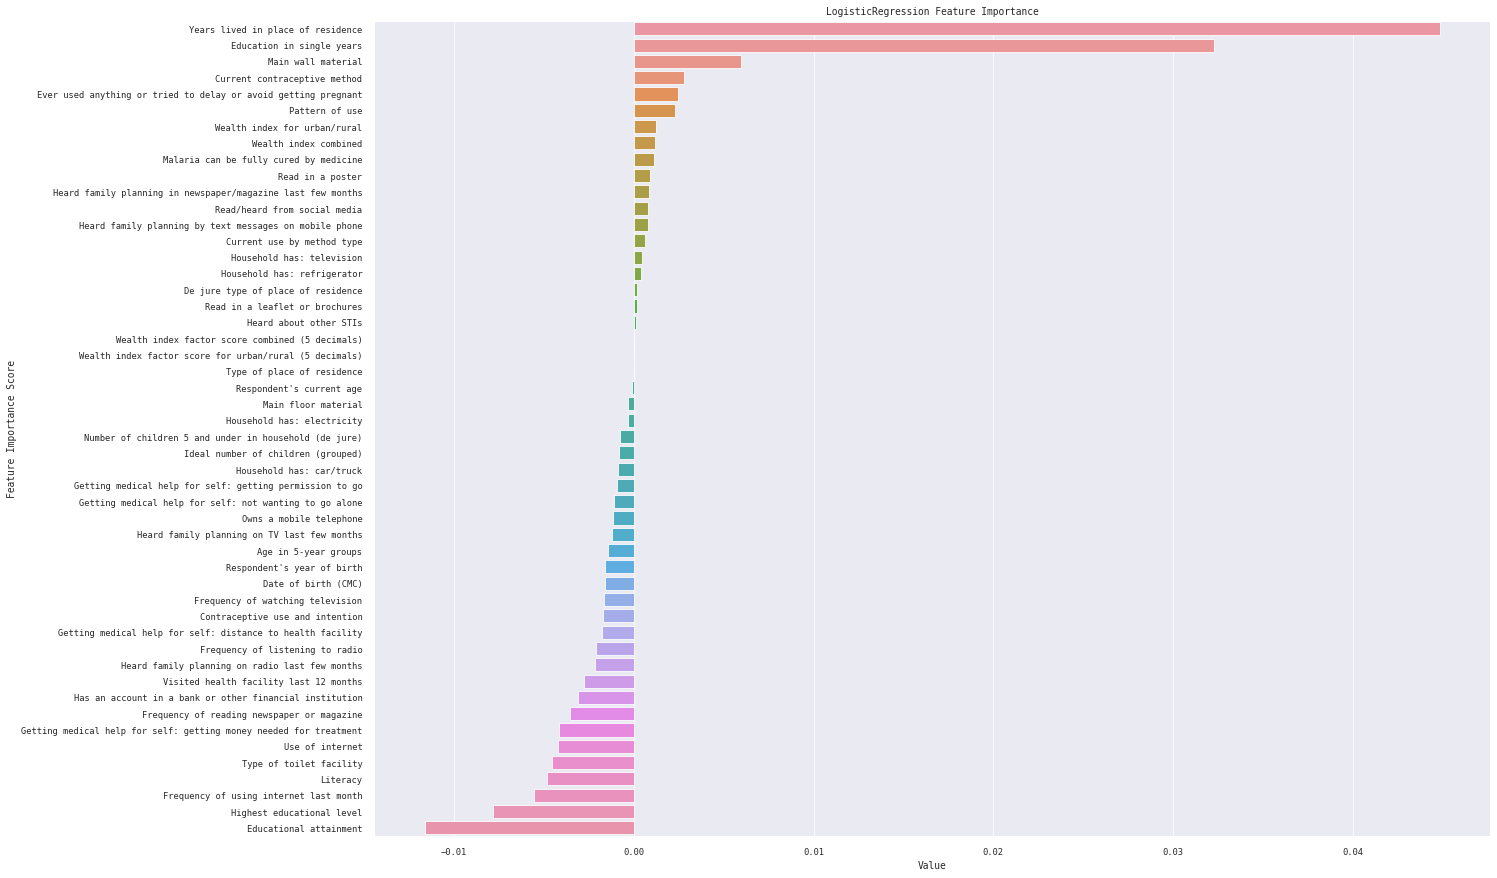

In [273]:
importance_plot(log_reg, X)

### Random Forest Classifier

In [274]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [275]:
rf_predict, rf_1 = fit_predict(rf, X, y)

Fold 0 : 0.531719323865315
Fold 1 : 0.5232454381235757
Fold 2 : 0.5194800950839891
Fold 3 : 0.5191937857453426
Fold 4 : 0.5234045431897038


Avg F1 score: 0.5234 


Evaluation metrics

In [ ]:
# check_metric(y_test, rf_predict)

In [ ]:
# print(classification_report(y_test, rf_predict))

Confusion matrix heatmap

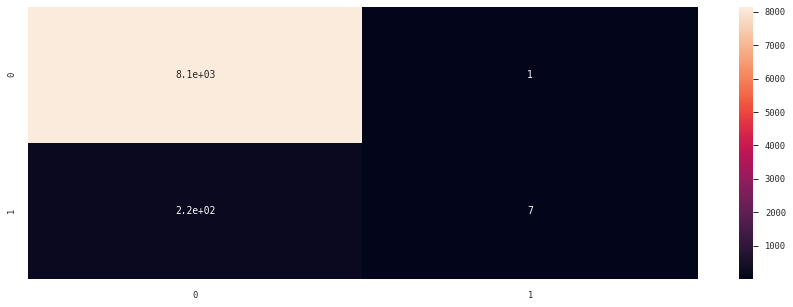

In [276]:
sns.heatmap(confusion_matrix(y_test, rf_predict), annot=True);

Feature Importance plot

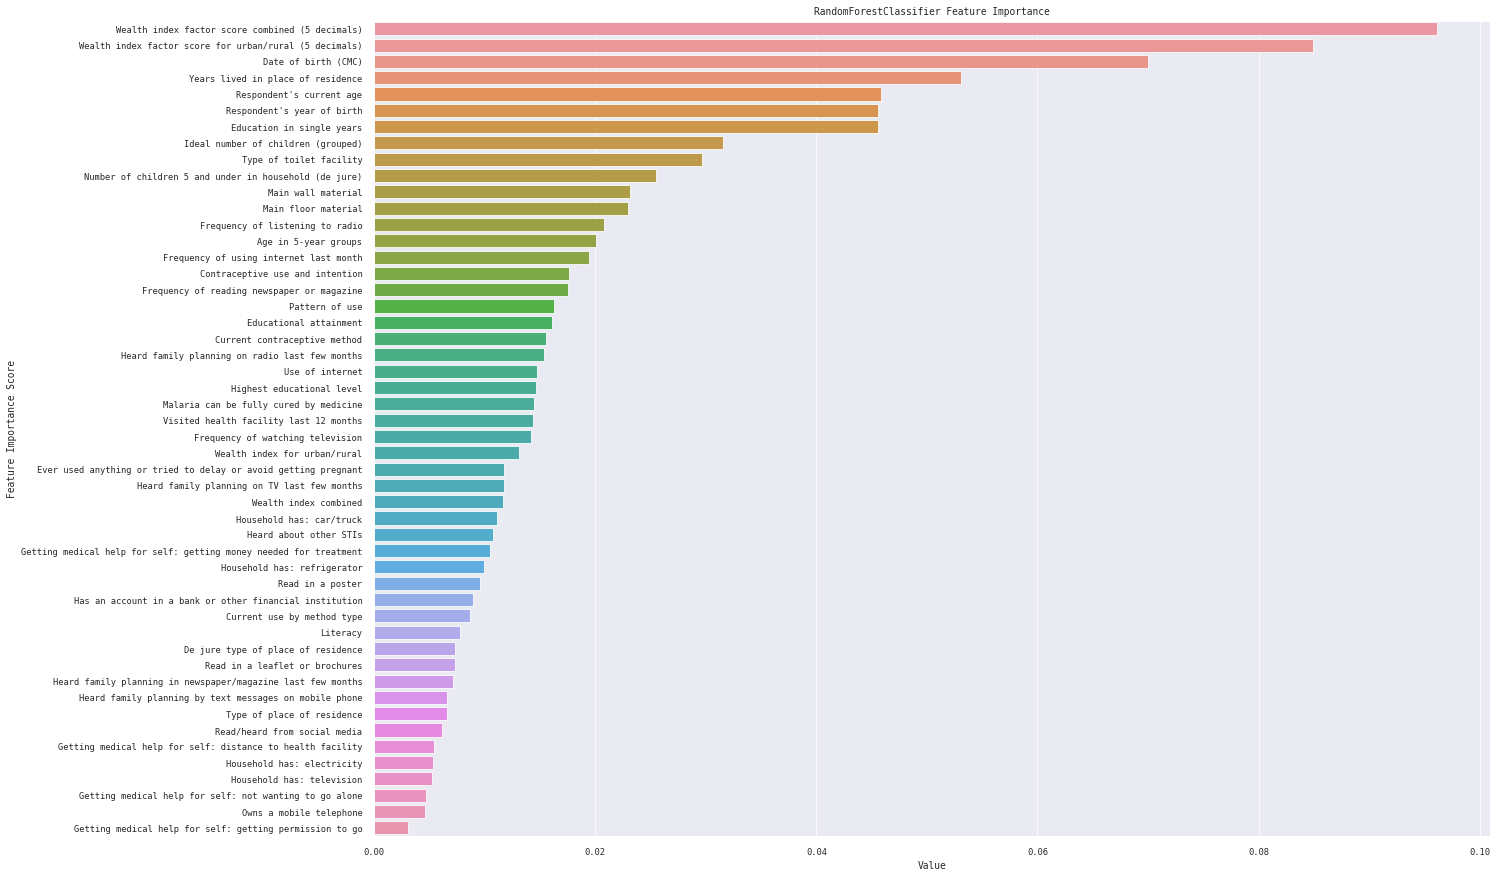

In [257]:
importance_plot(rf, X)

### Catboost

In [73]:
!pip install catboost --quiet

     |████████████████████████████████| 65.7MB 54kB/s 


In [277]:
from catboost import CatBoostClassifier

cb_ = CatBoostClassifier(silent=True)

In [278]:
cb_predict, cb__ = fit_predict(cb_, X, y)

Fold 0 : 0.5732784103012603
Fold 1 : 0.5732784103012603
Fold 2 : 0.5732784103012603
Fold 3 : 0.5732784103012603
Fold 4 : 0.5732784103012603


Avg F1 score: 0.5733 


Evaluation metrics

In [279]:
# check_metric(y_test, predict)

In [280]:
# print(classification_report(y_test, predict))

Confusion matrix heatmap

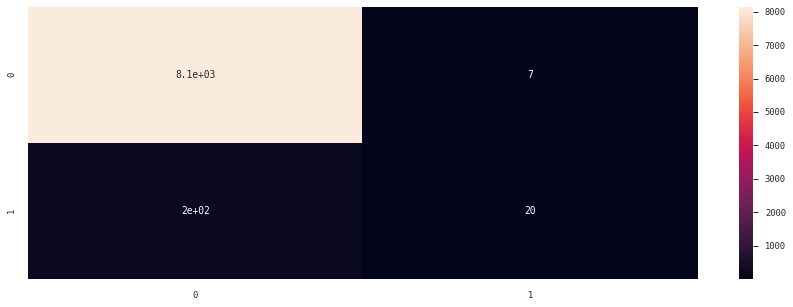

In [281]:
sns.heatmap(confusion_matrix(y_test, cb_predict), annot=True);

Feature importance plot

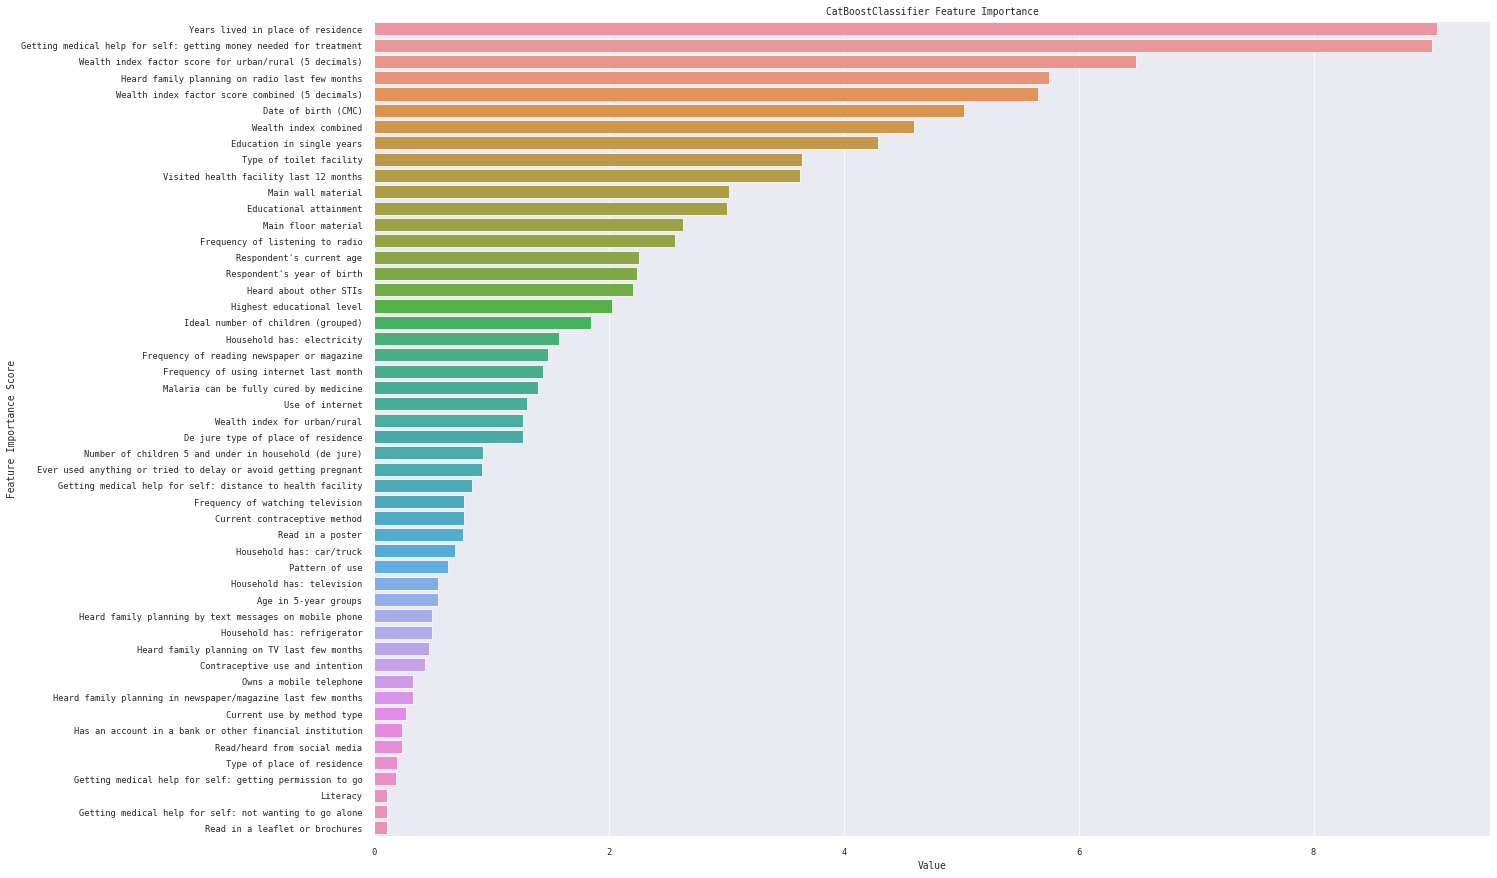

In [282]:
importance_plot(cb_, X)